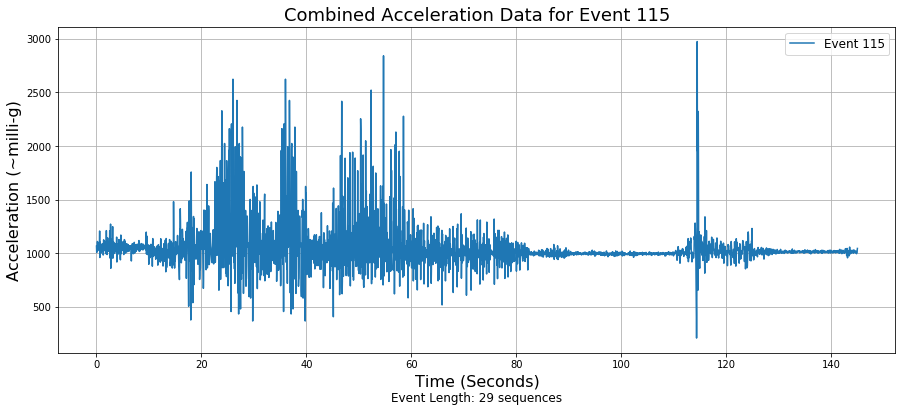

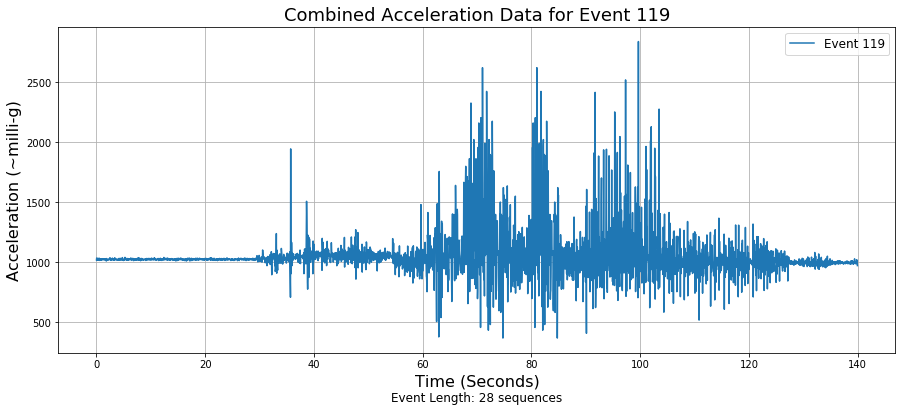

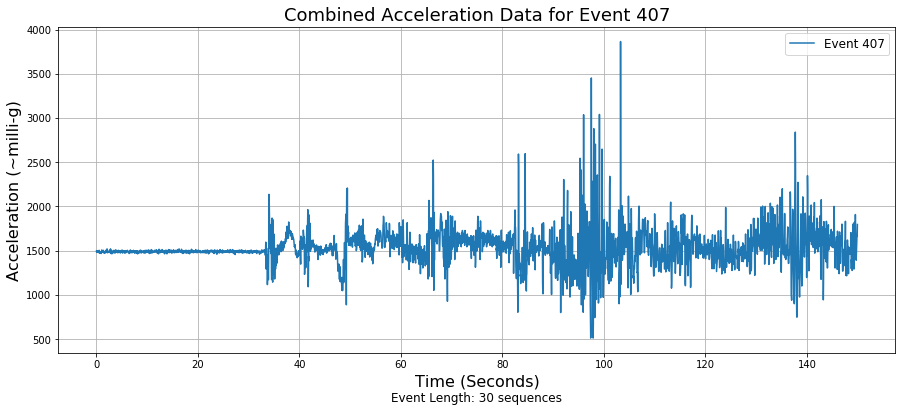

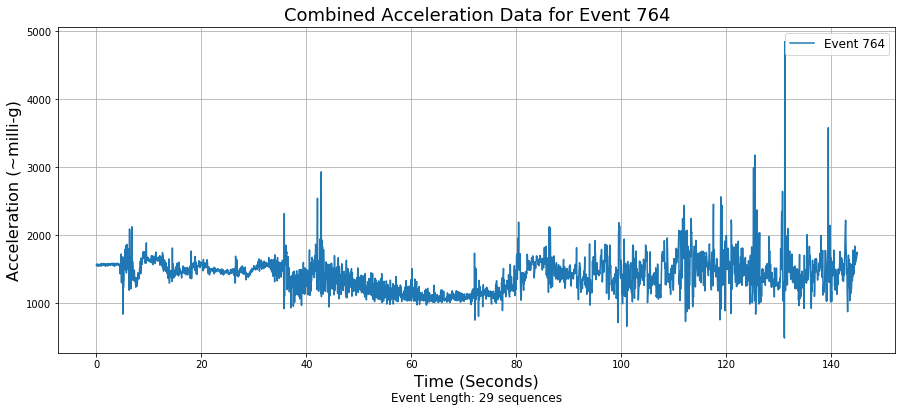

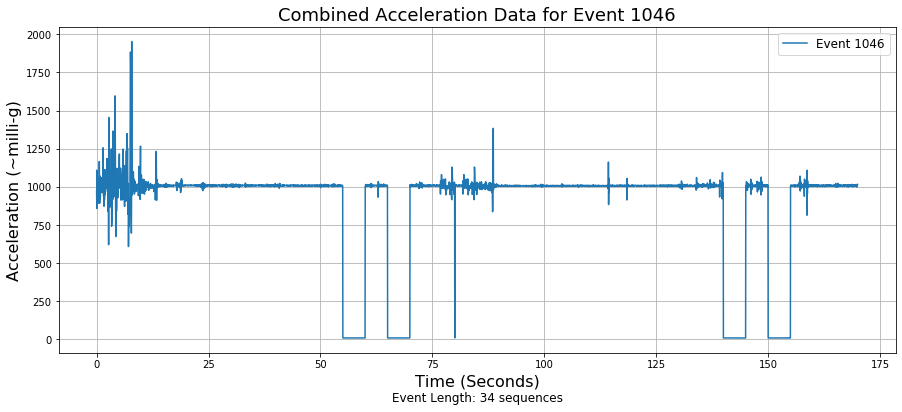

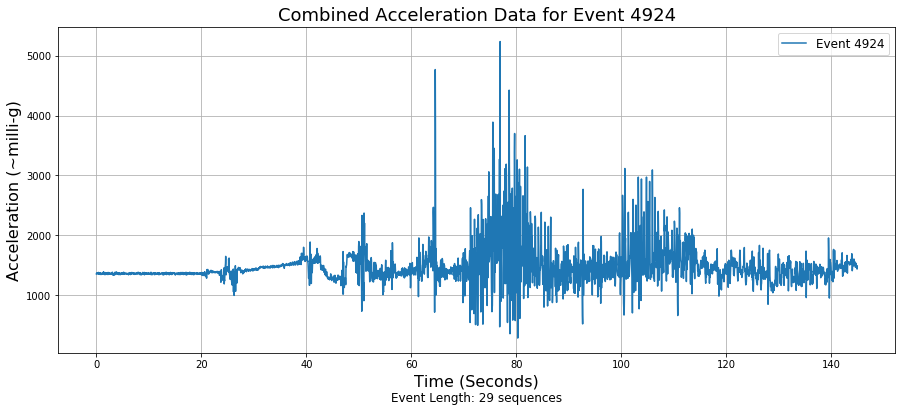

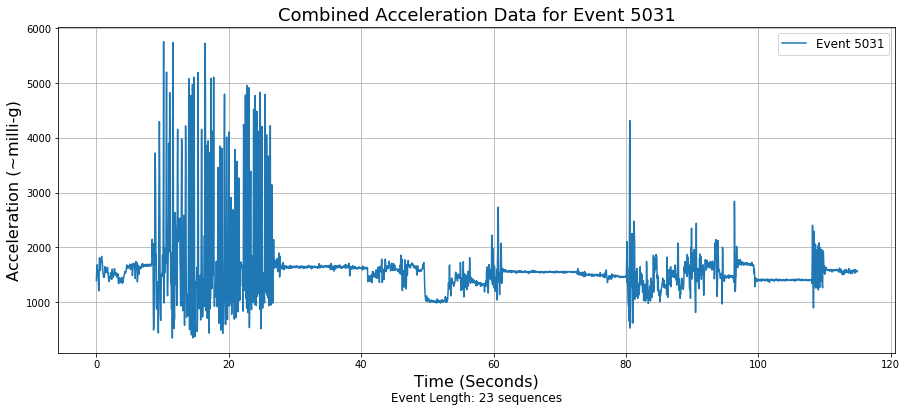

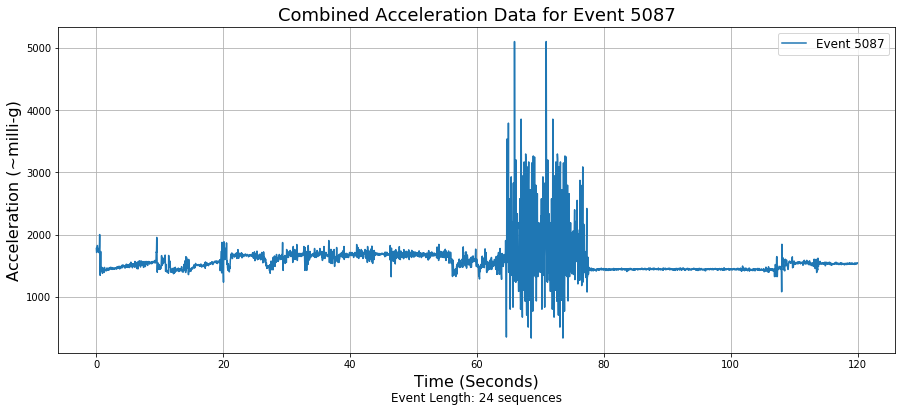

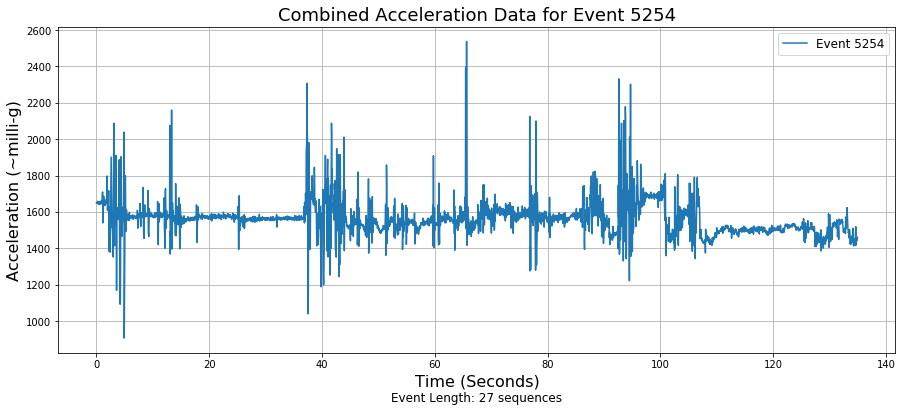

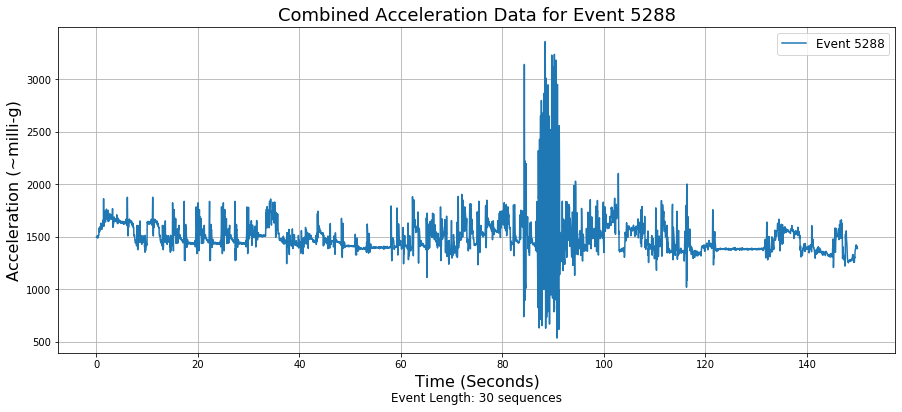

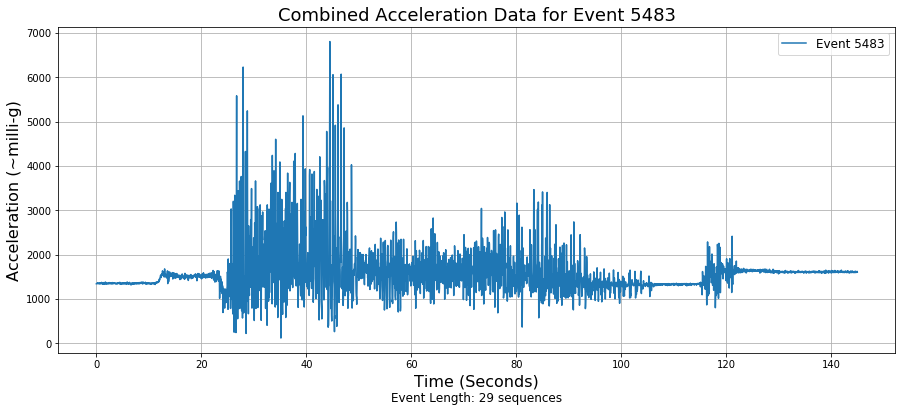

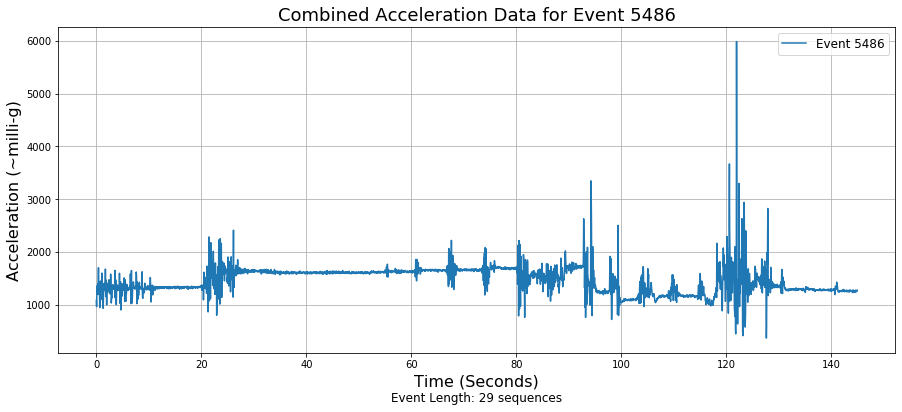

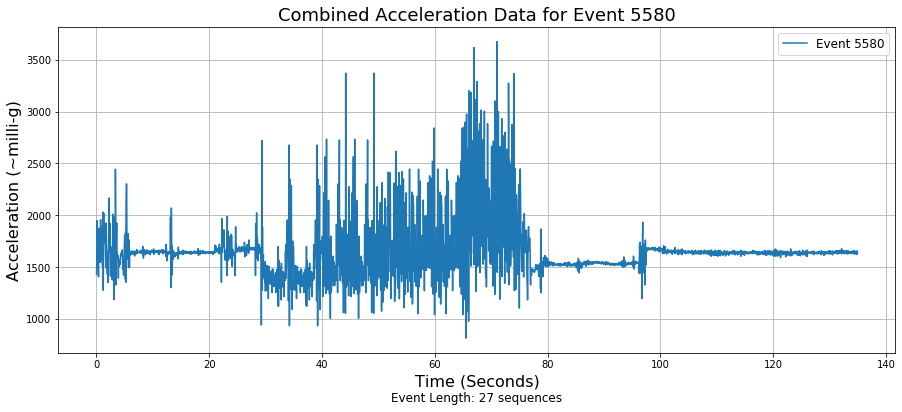

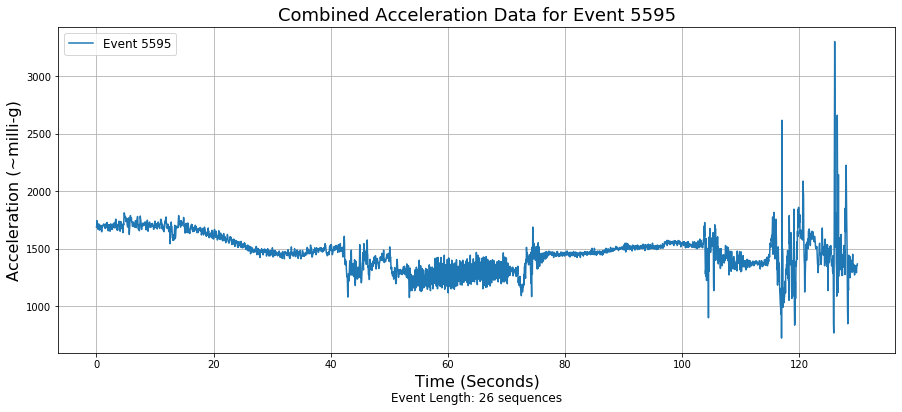

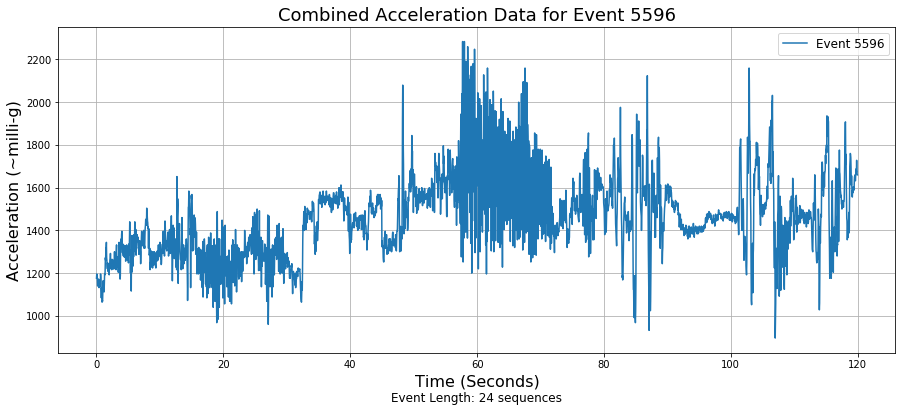

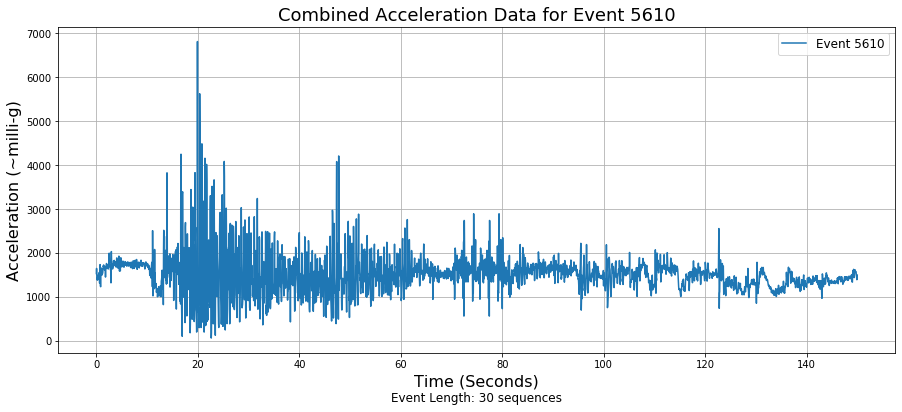

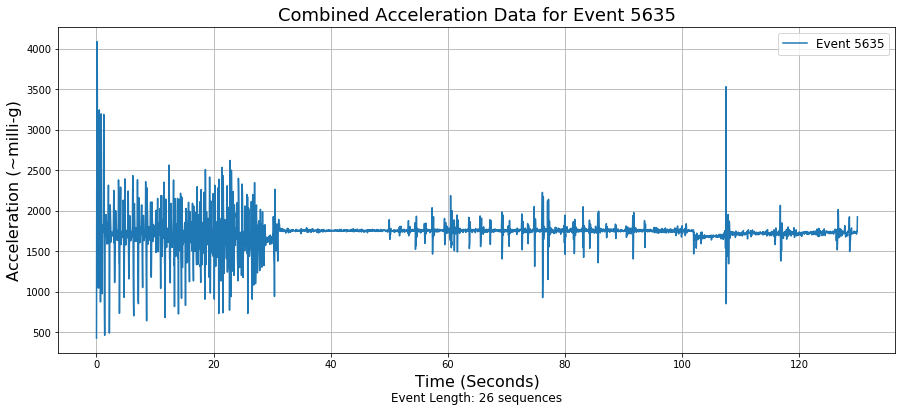

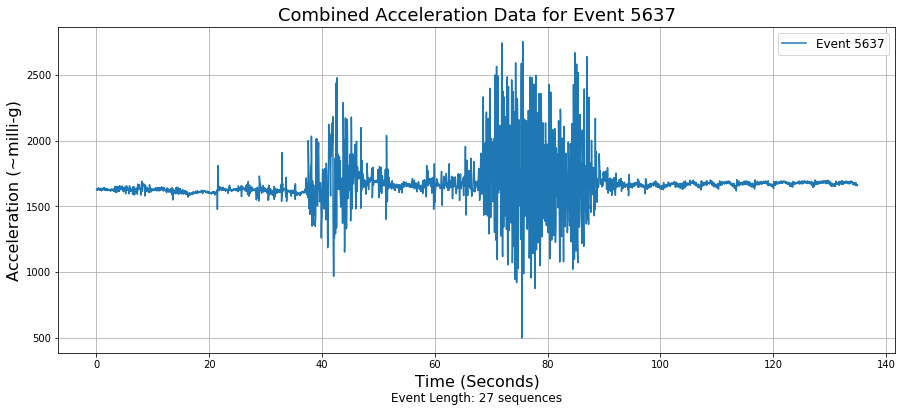

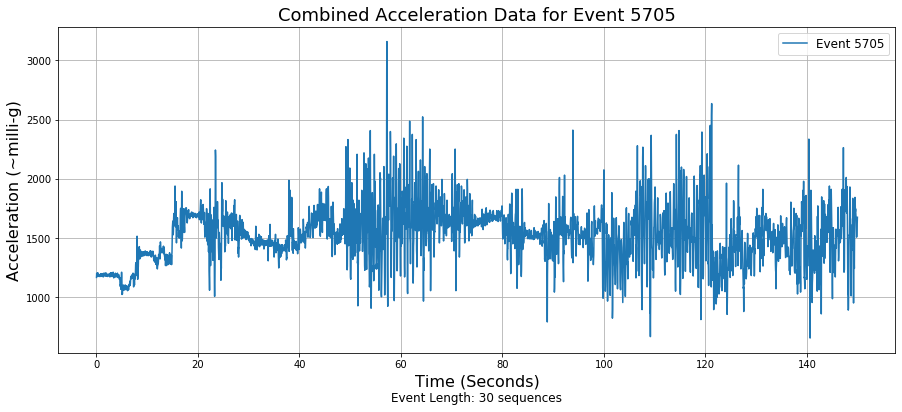

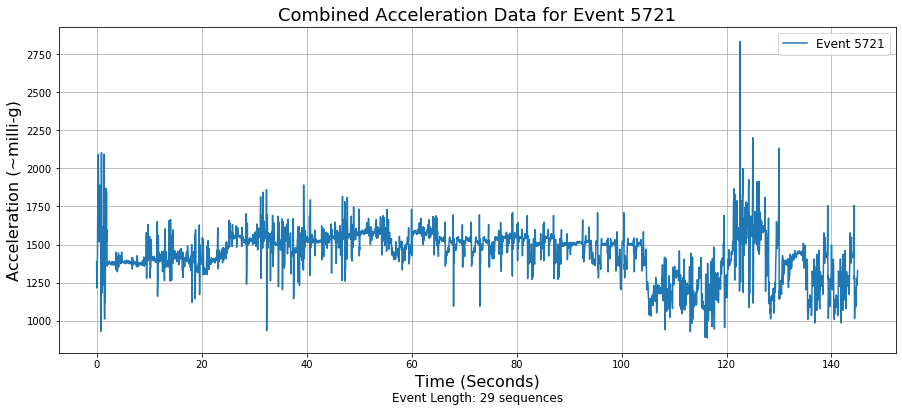

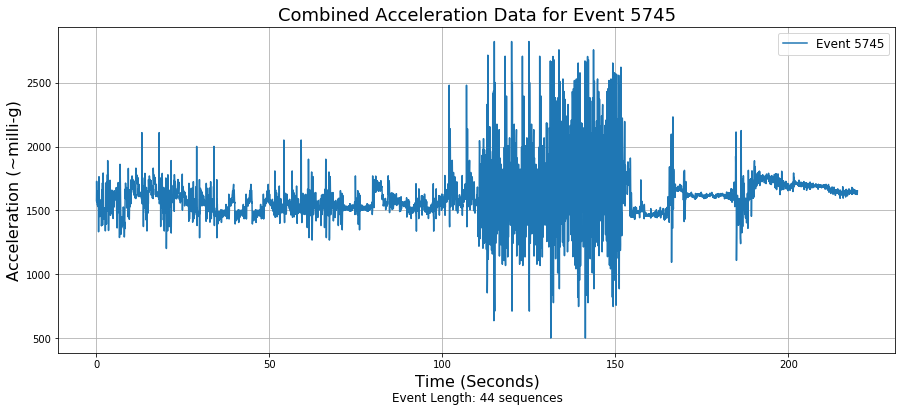

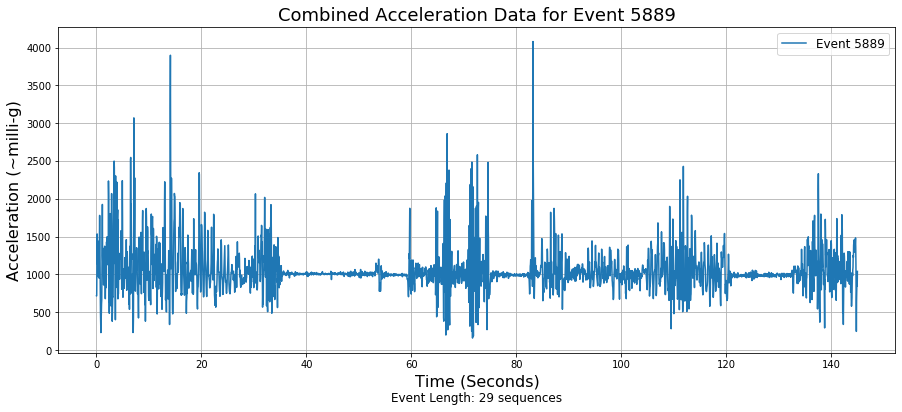

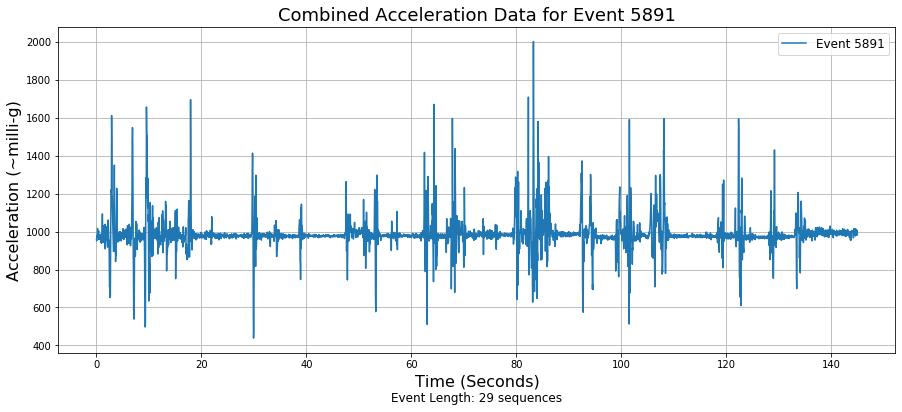

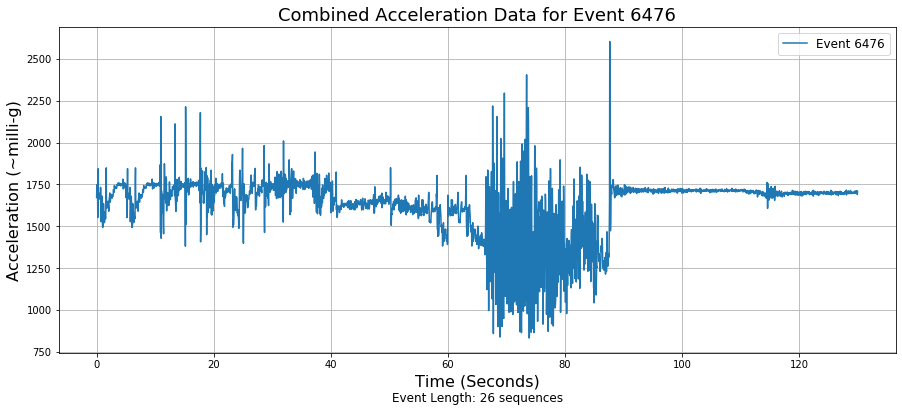

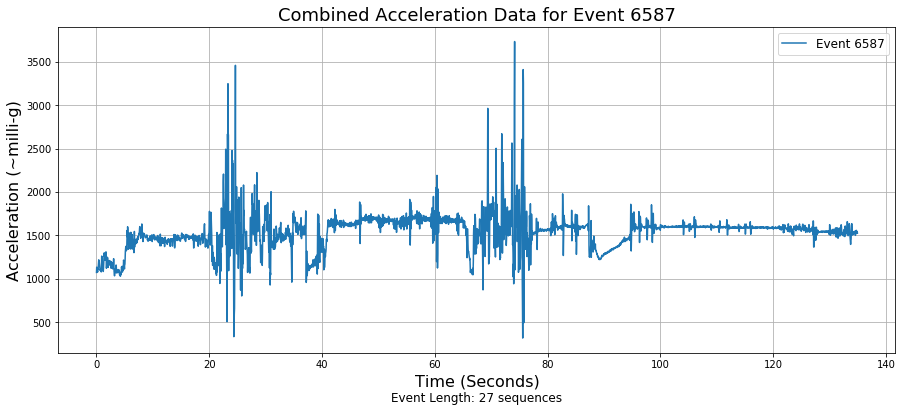

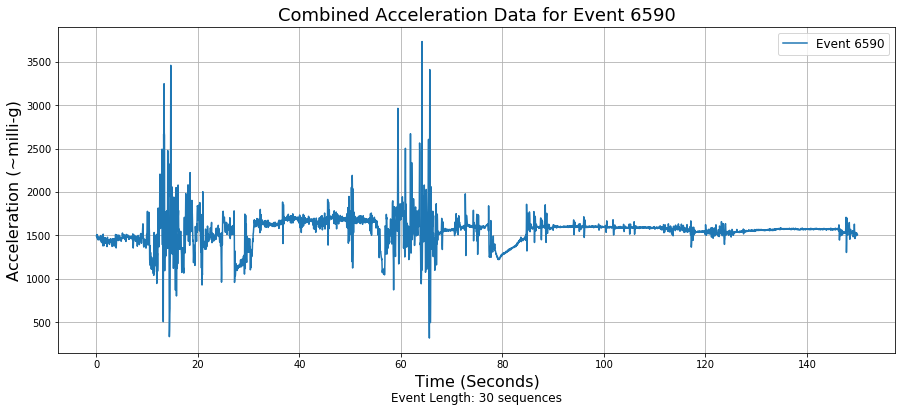

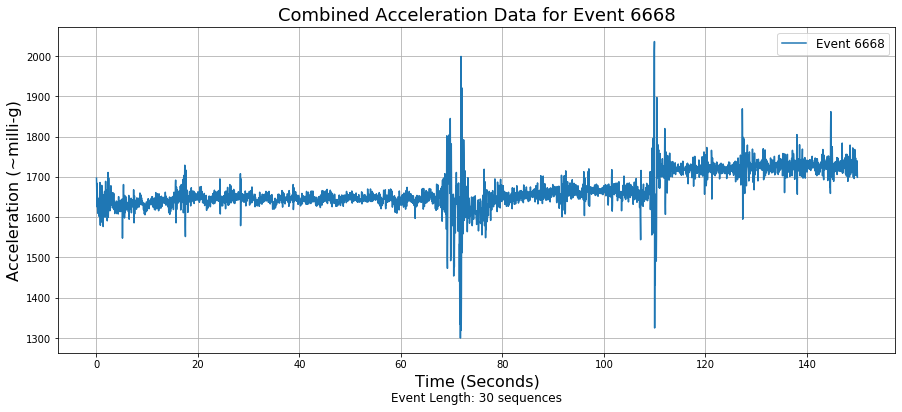

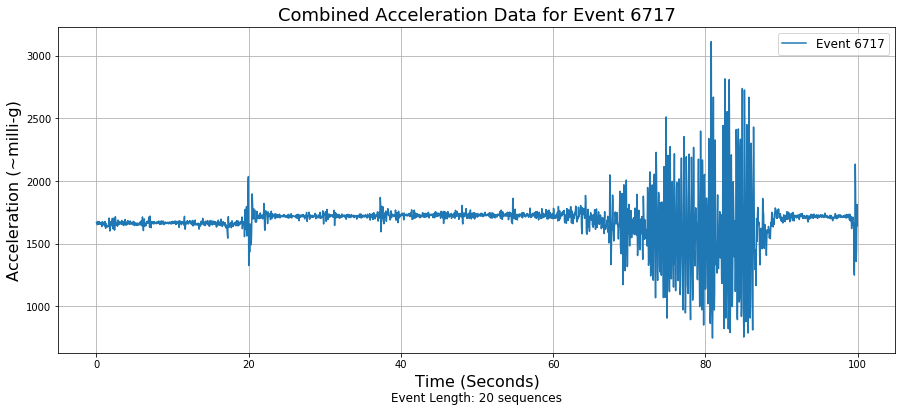

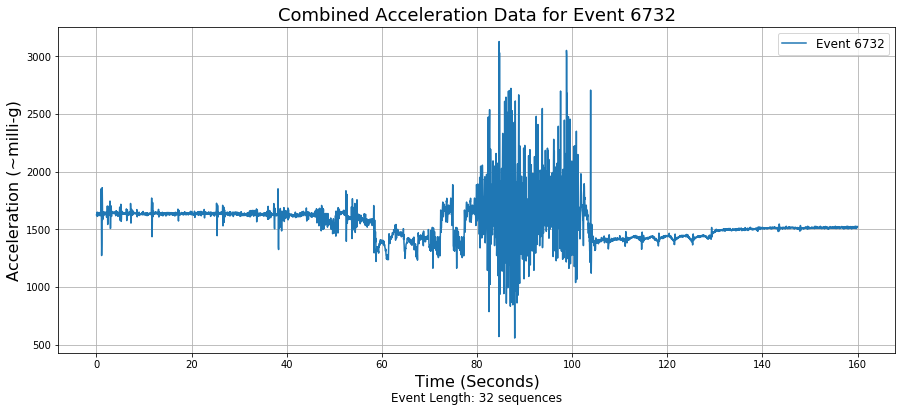

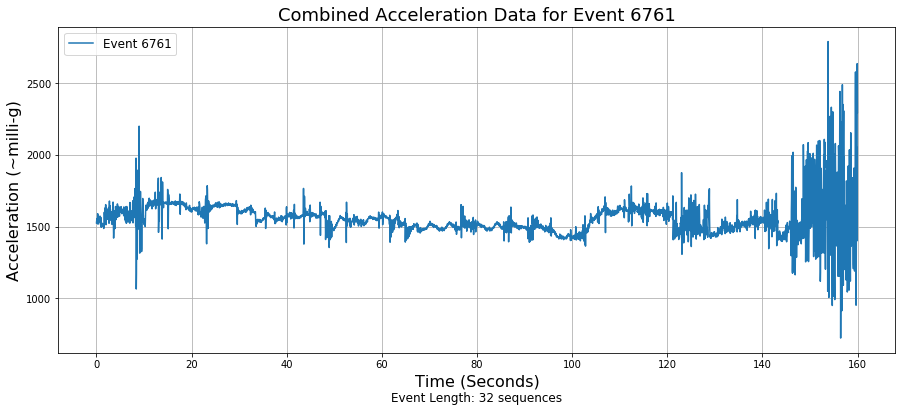

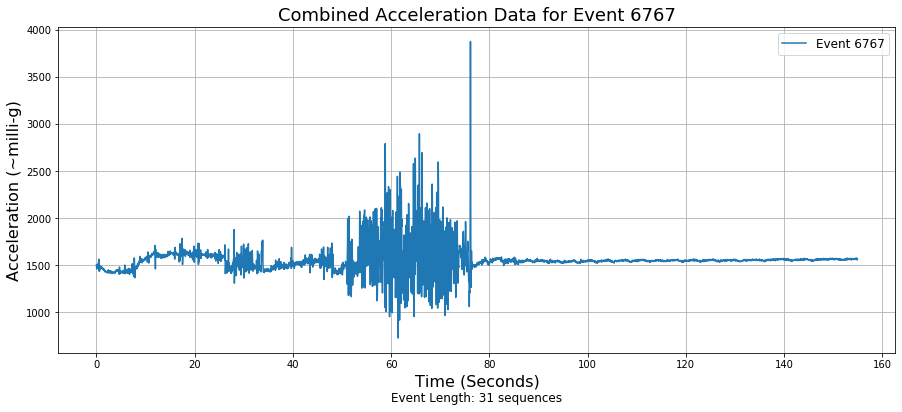

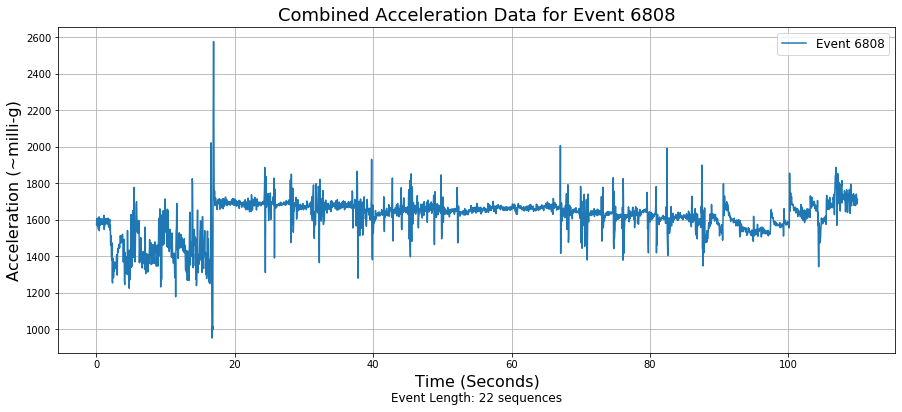

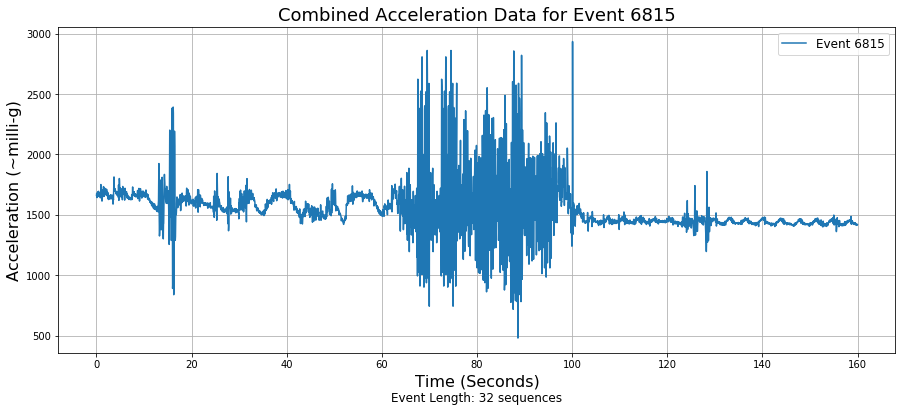

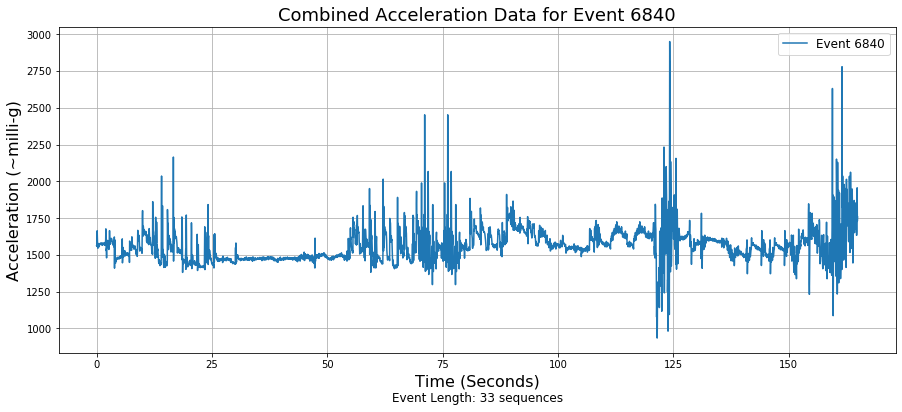

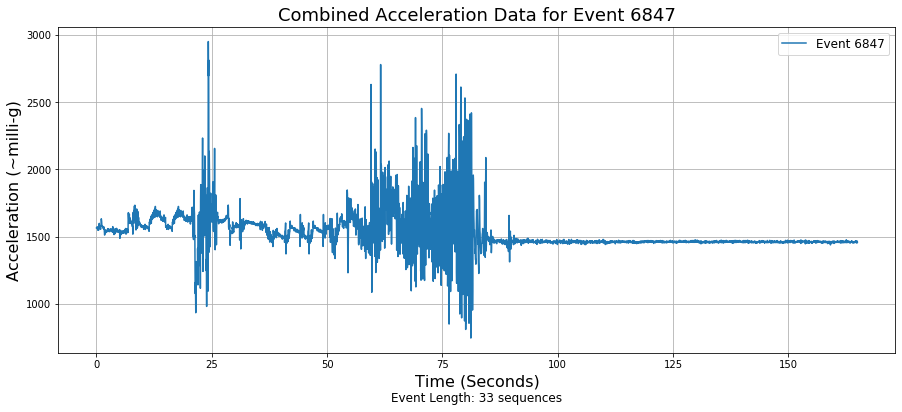

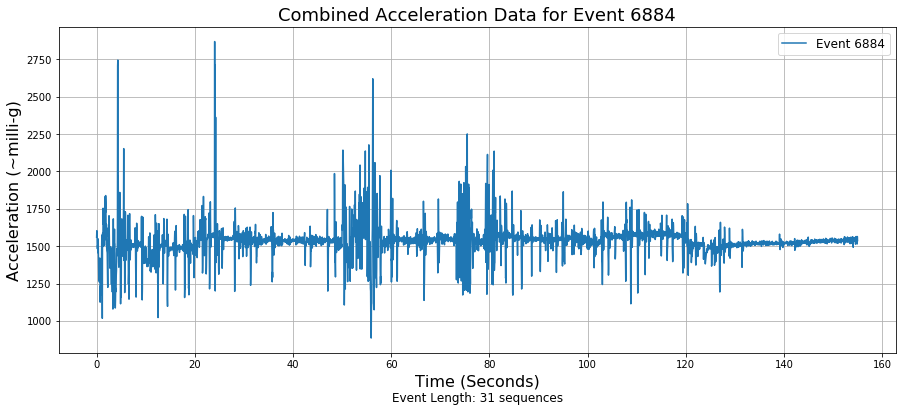

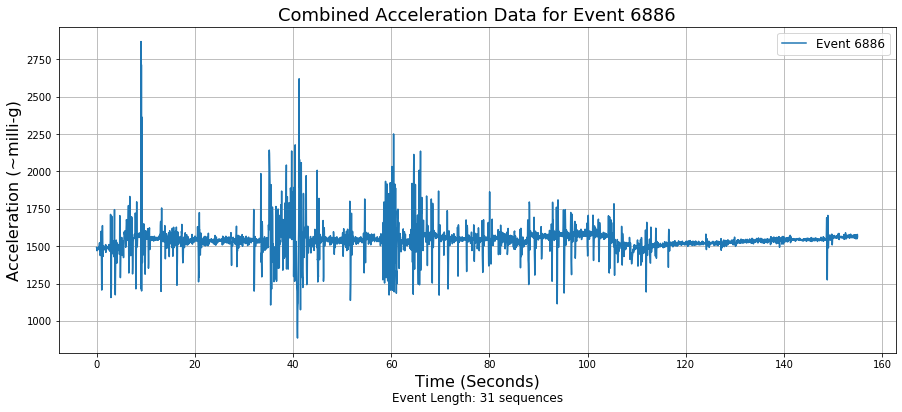

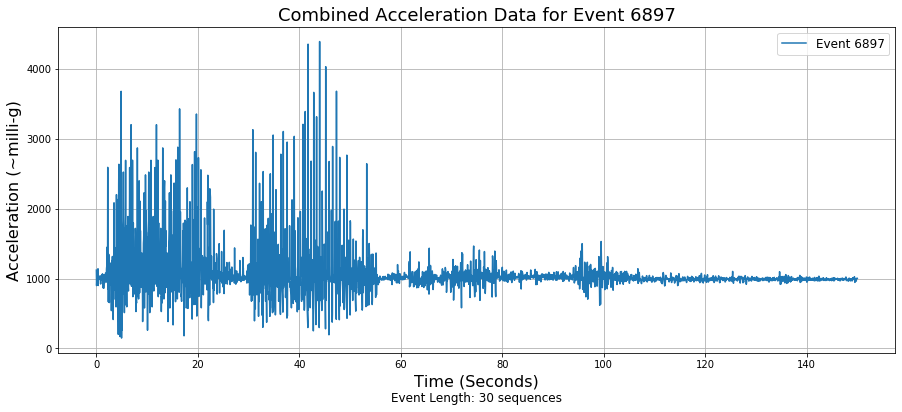

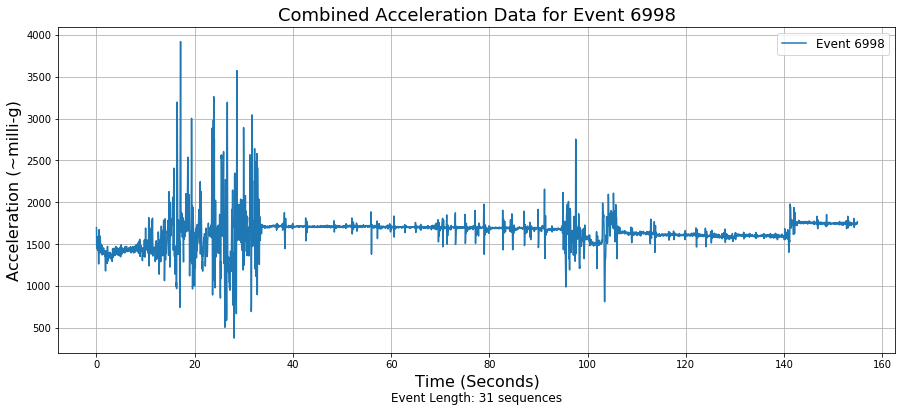

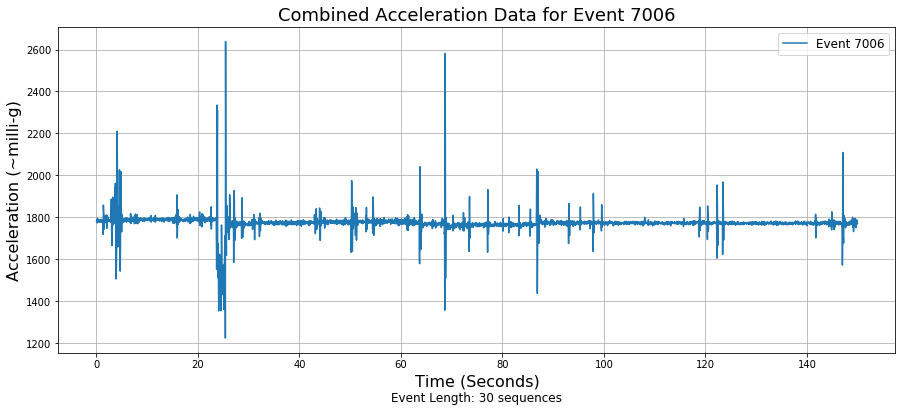

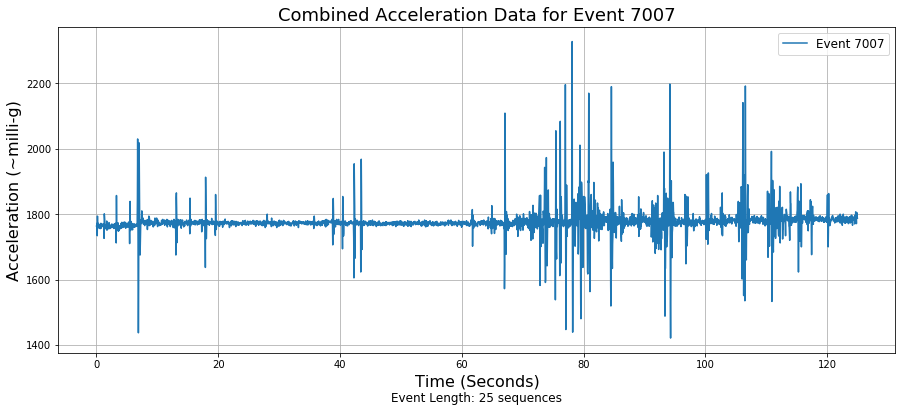

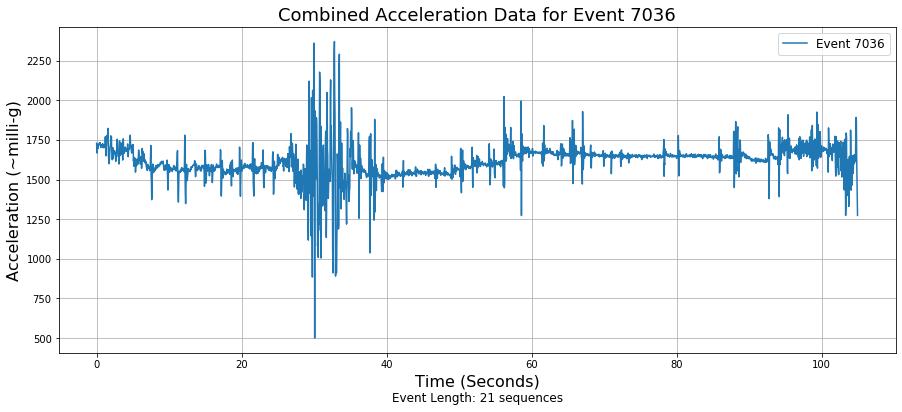

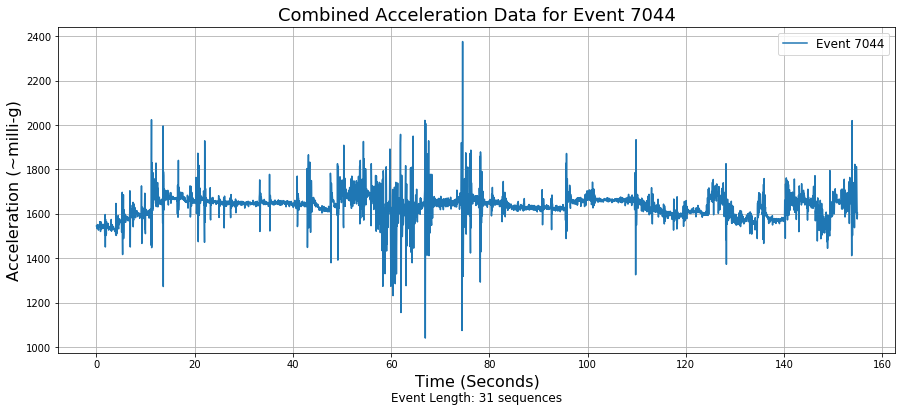

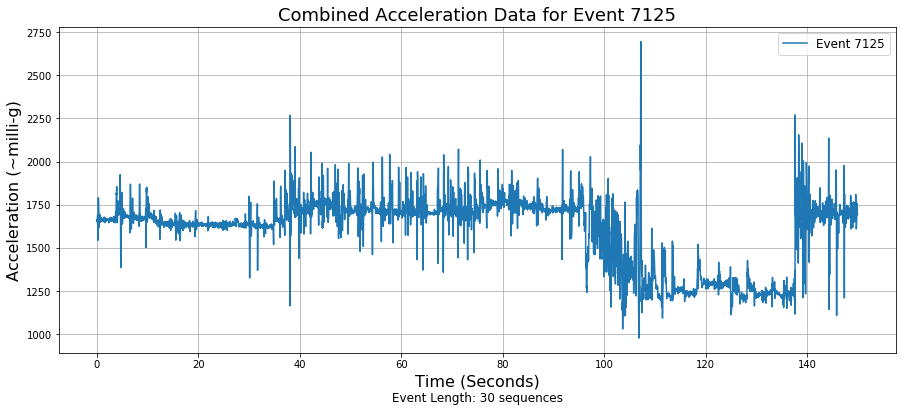

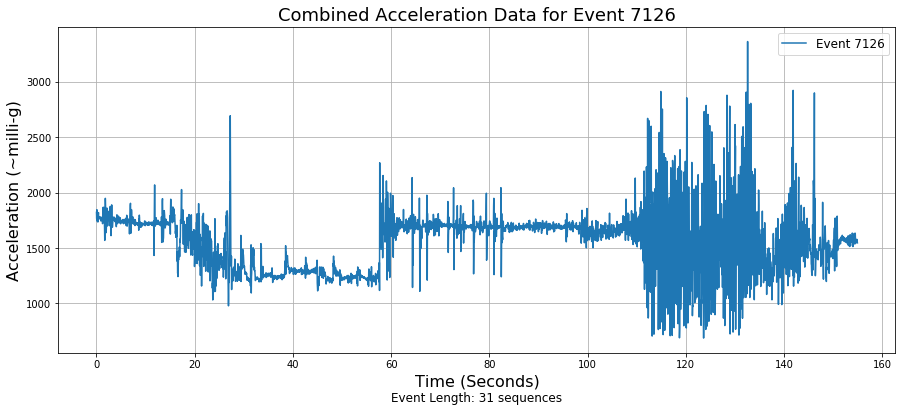

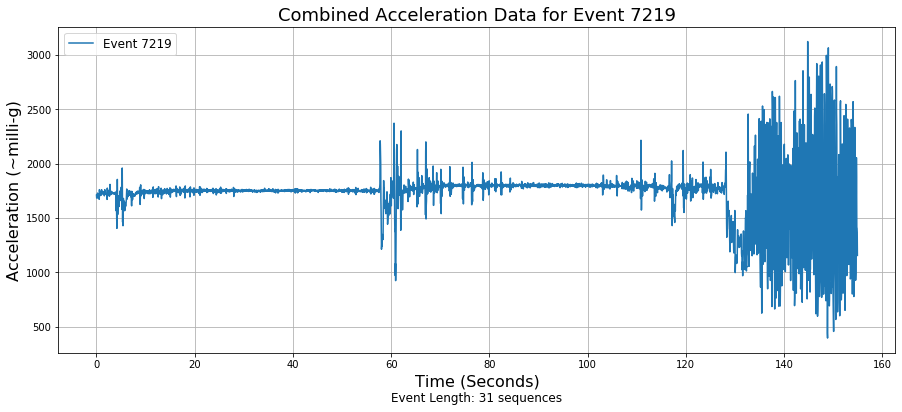

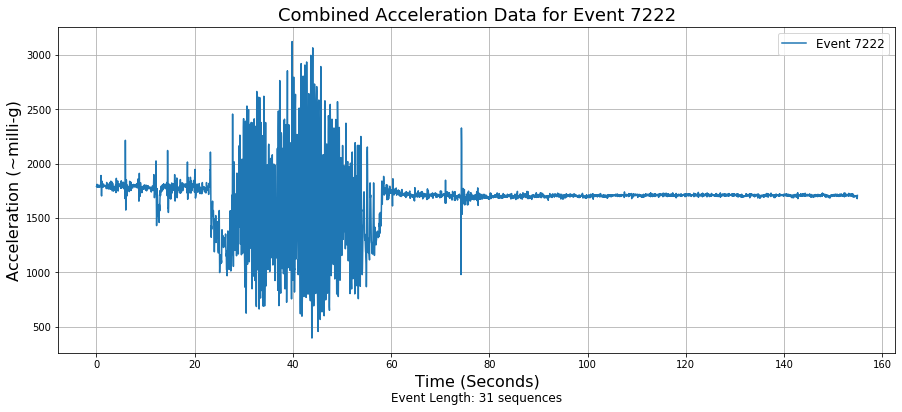

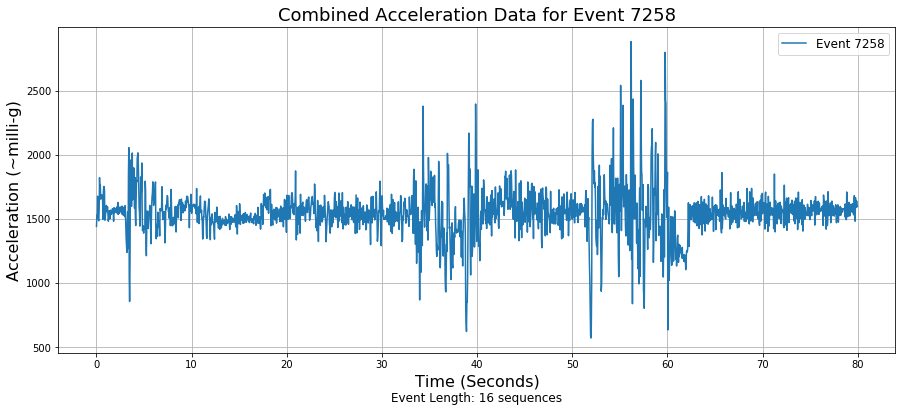

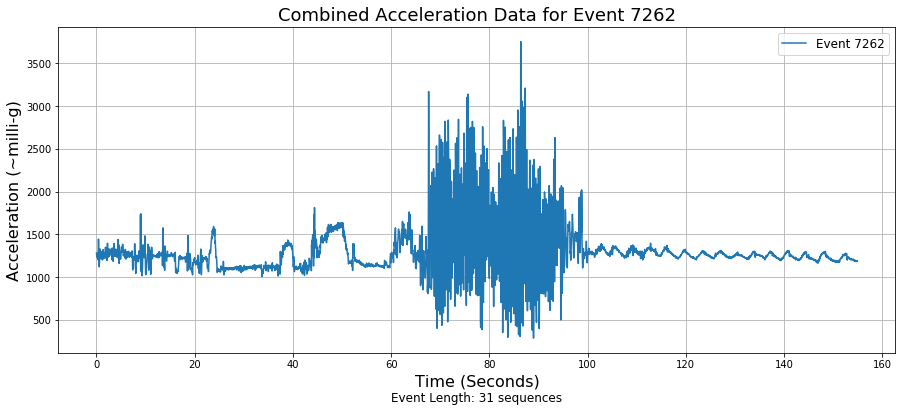

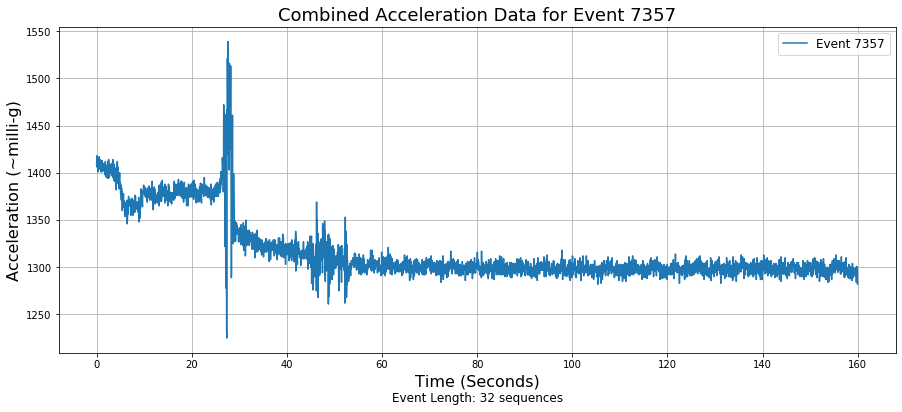

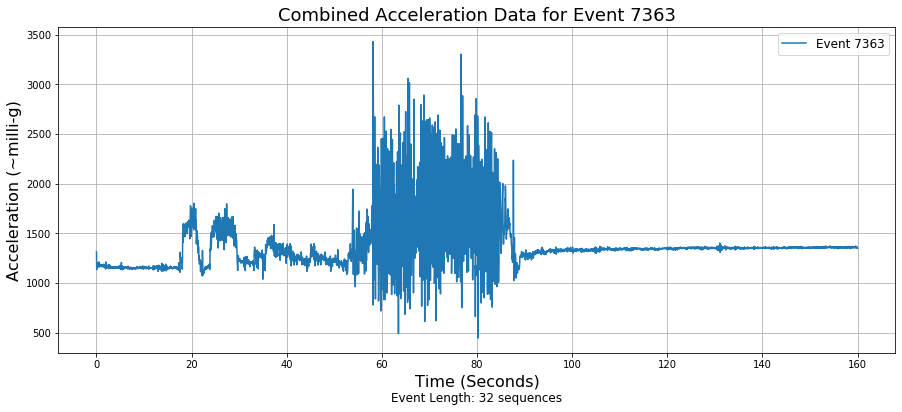

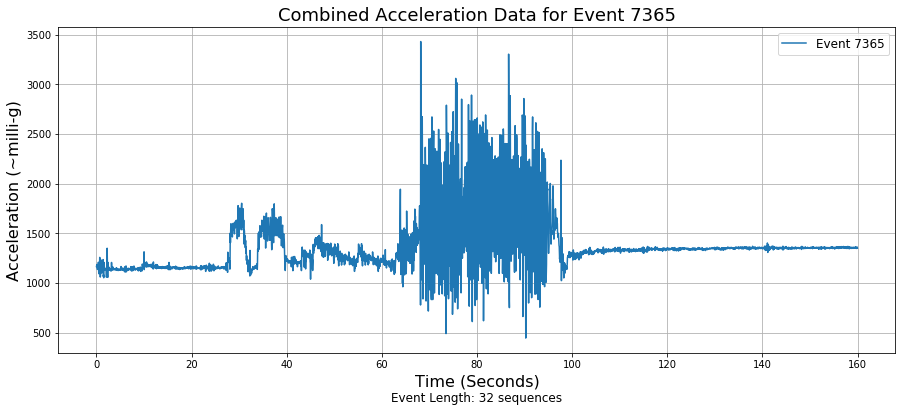

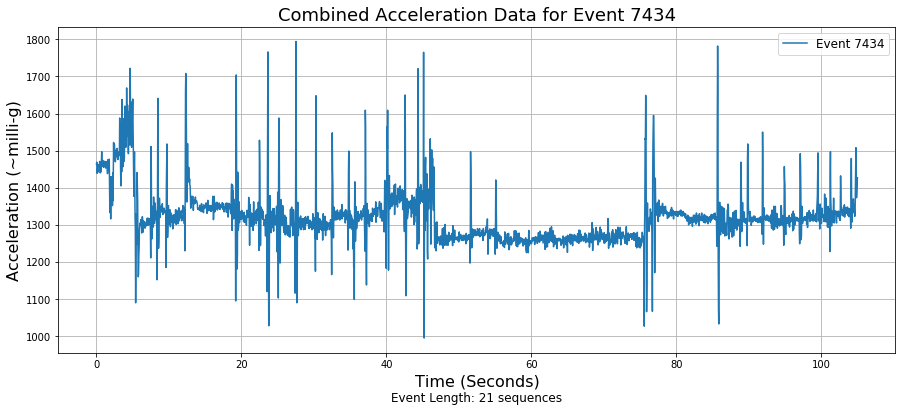

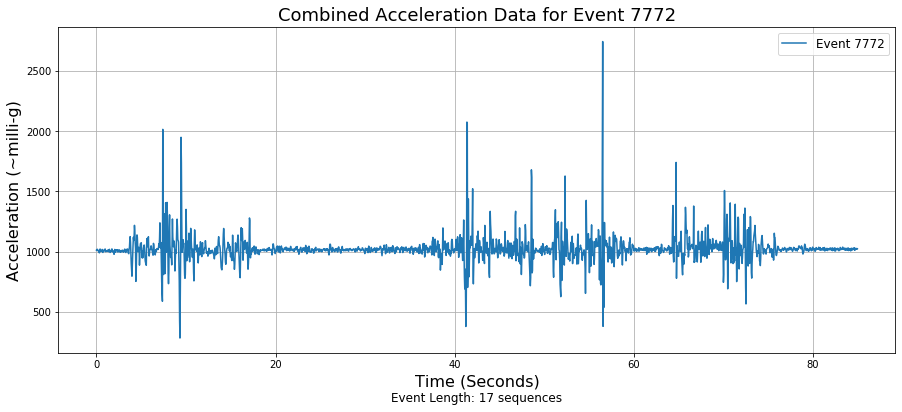

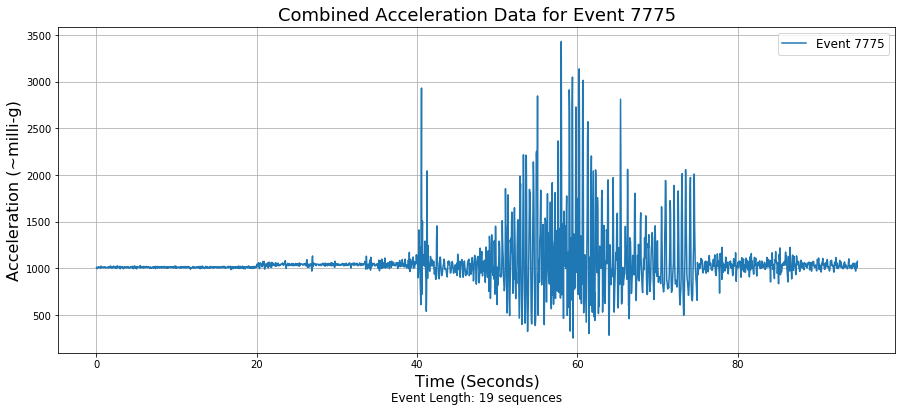

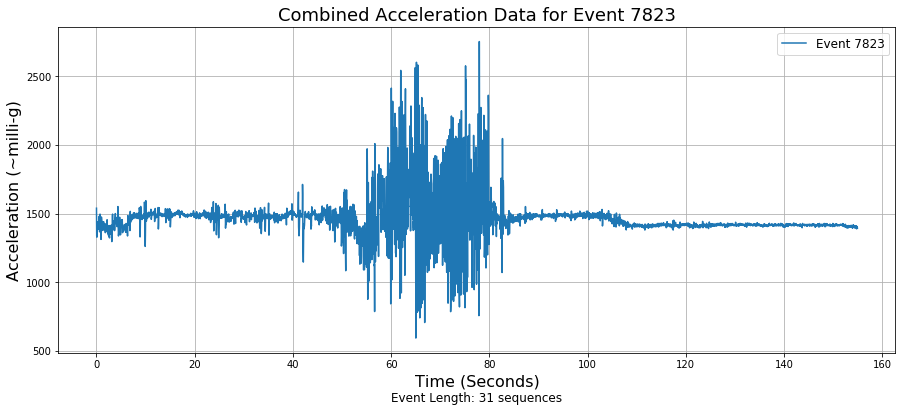

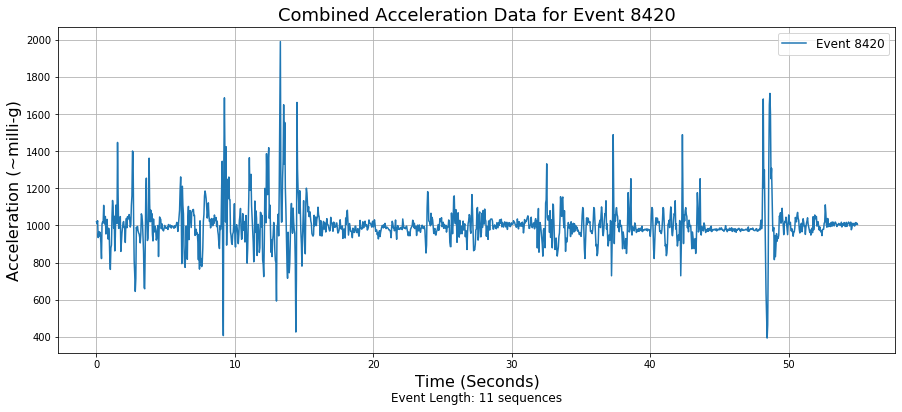

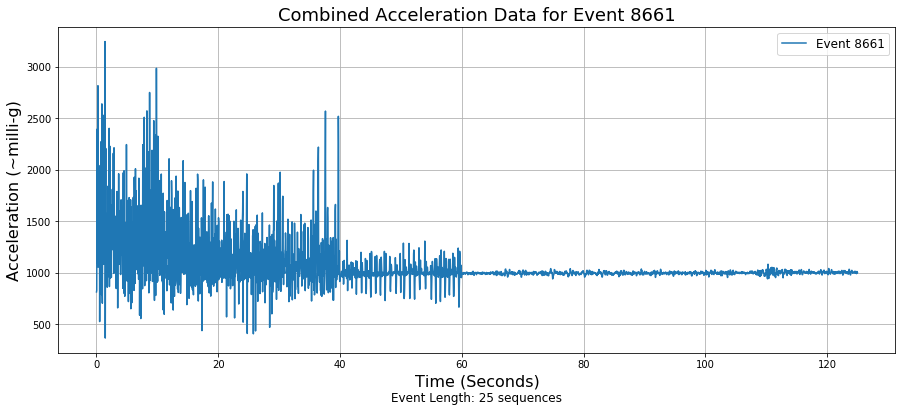

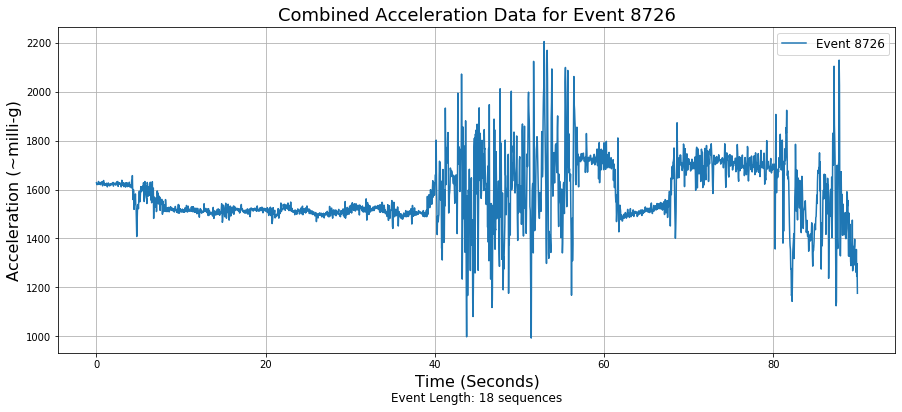

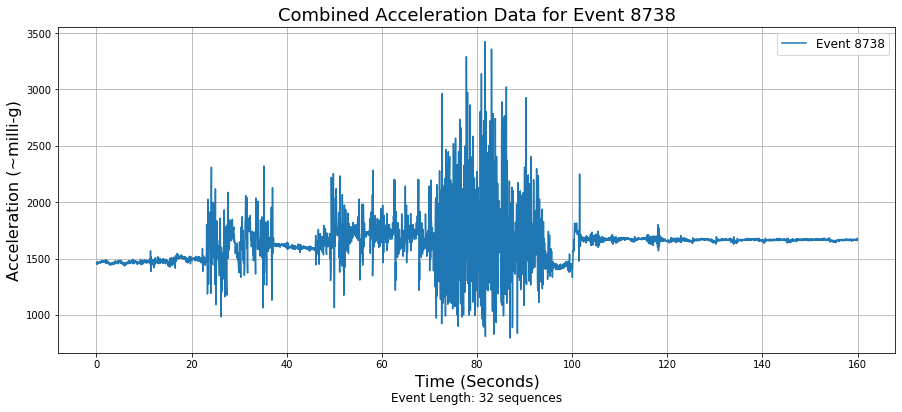

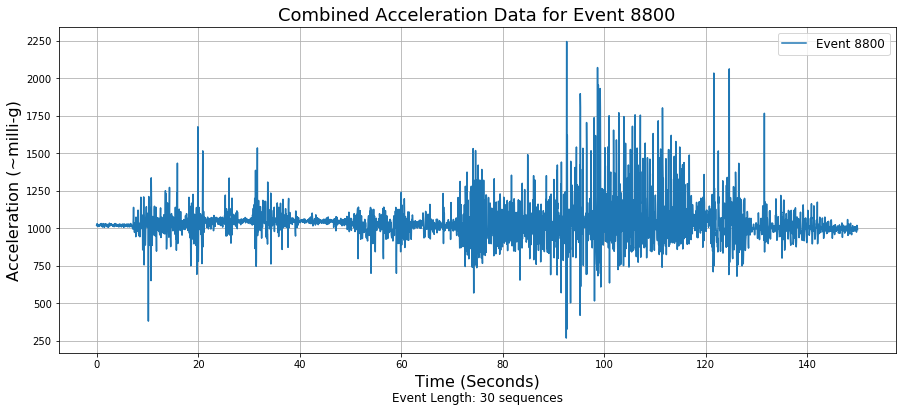

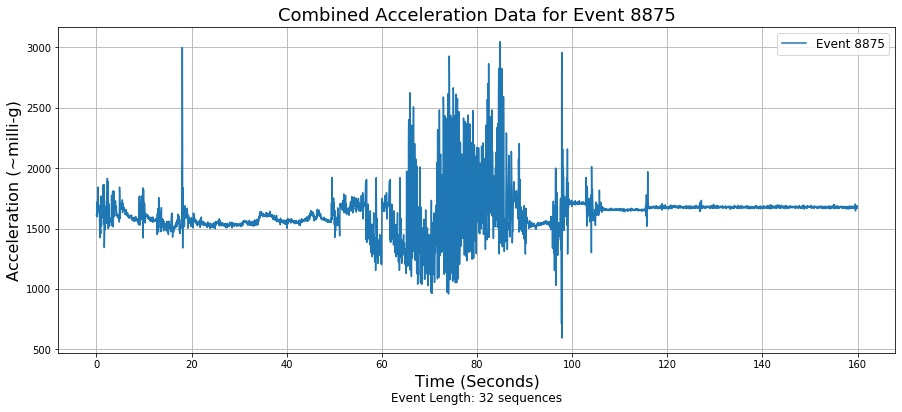

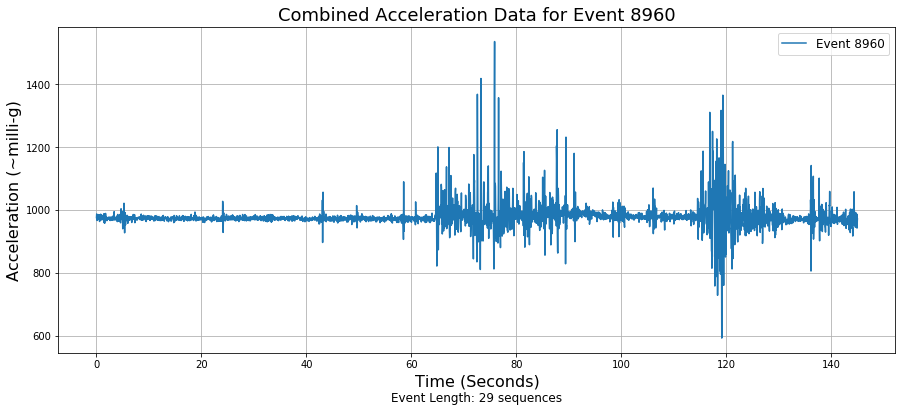

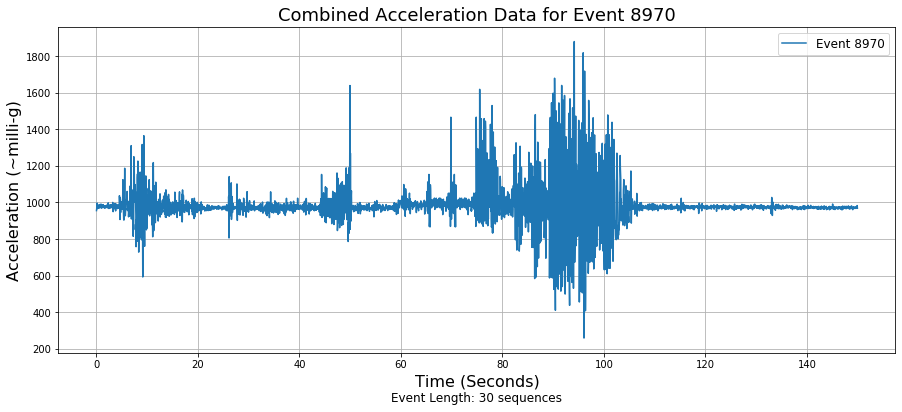

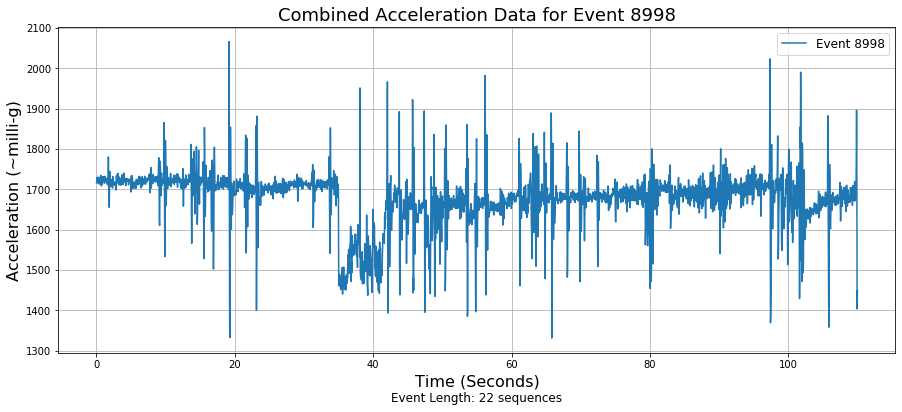

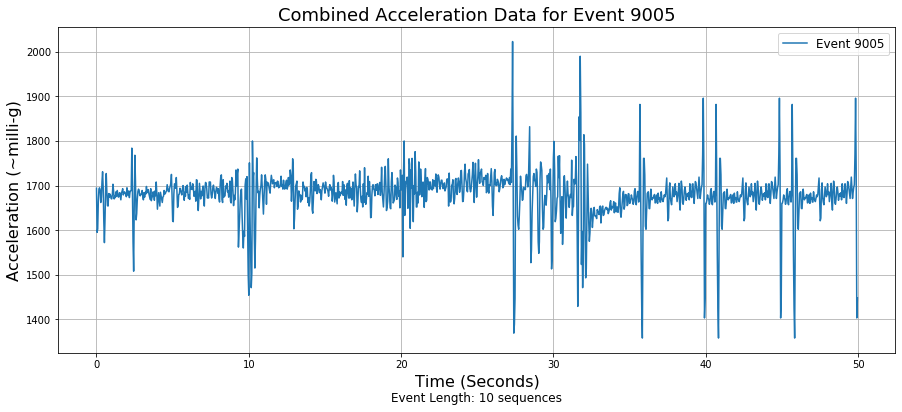

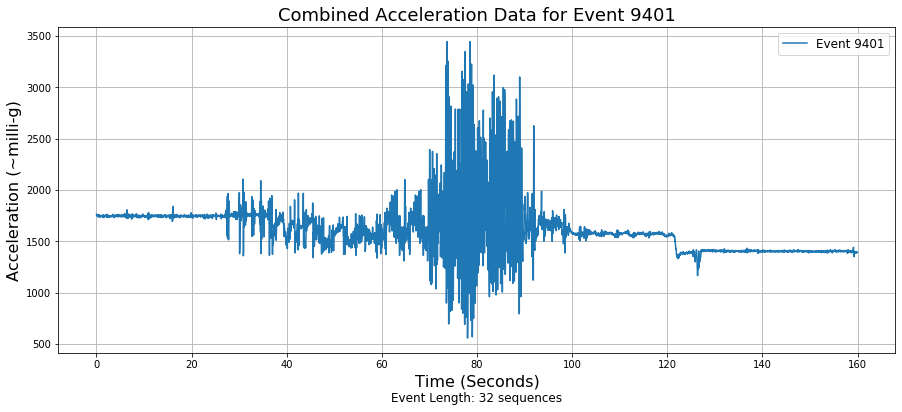

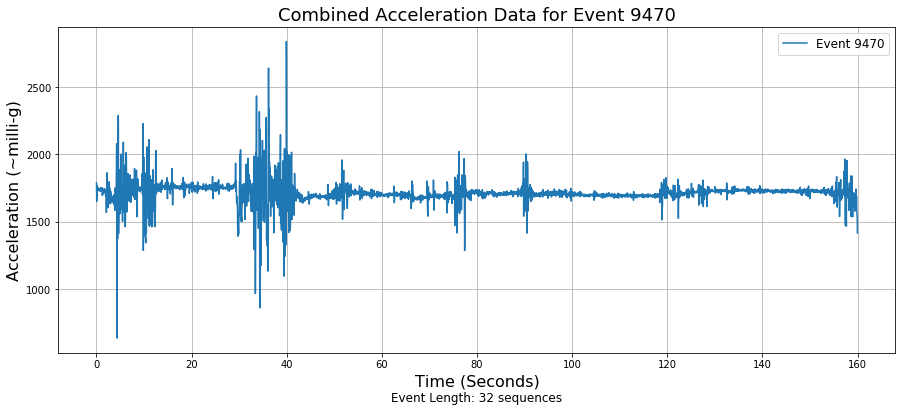

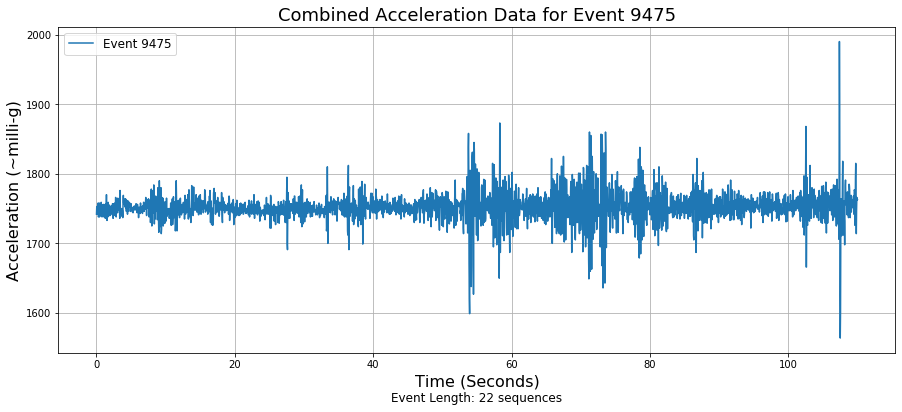

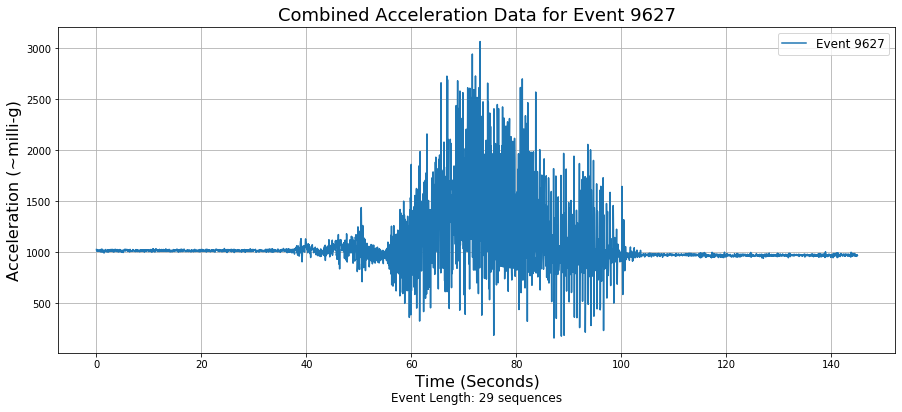

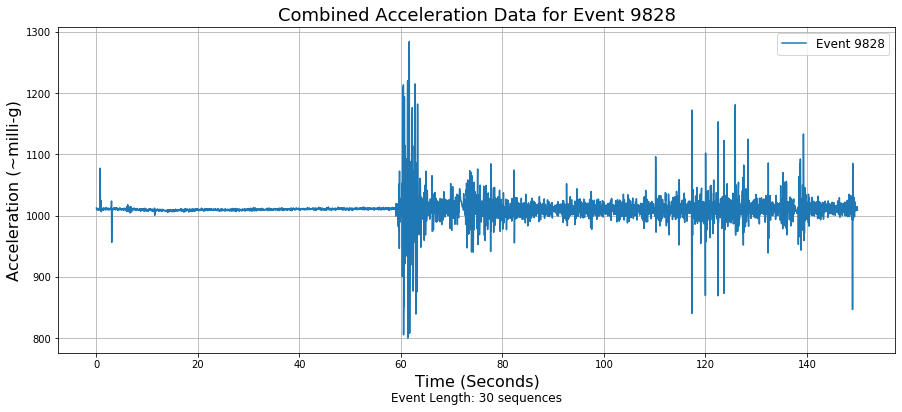

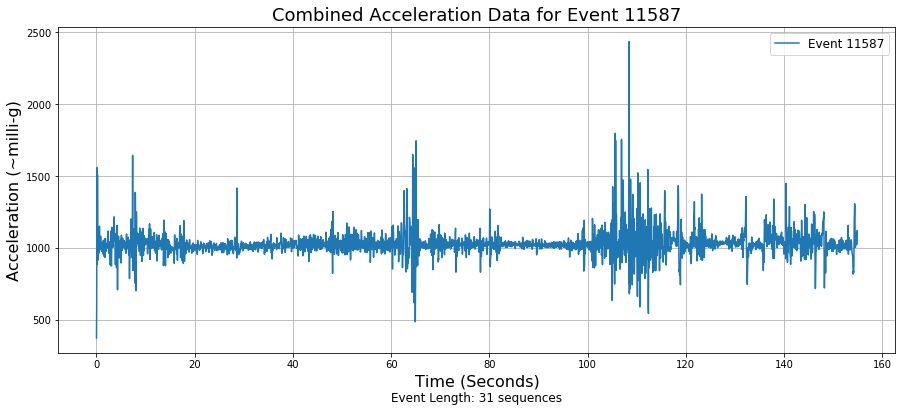

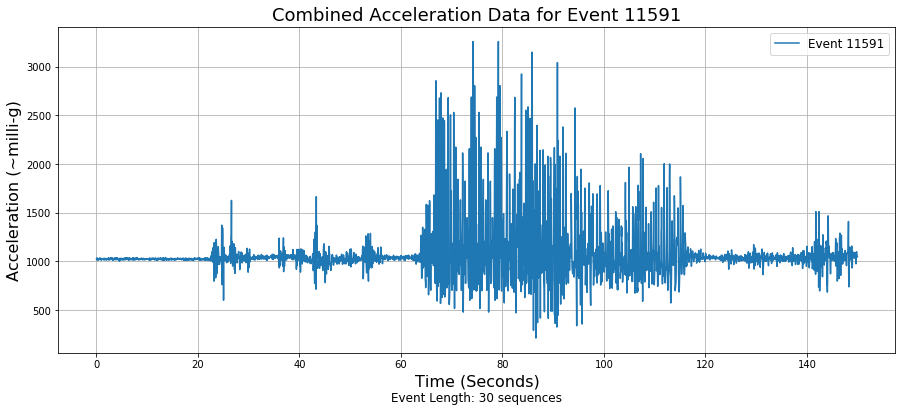

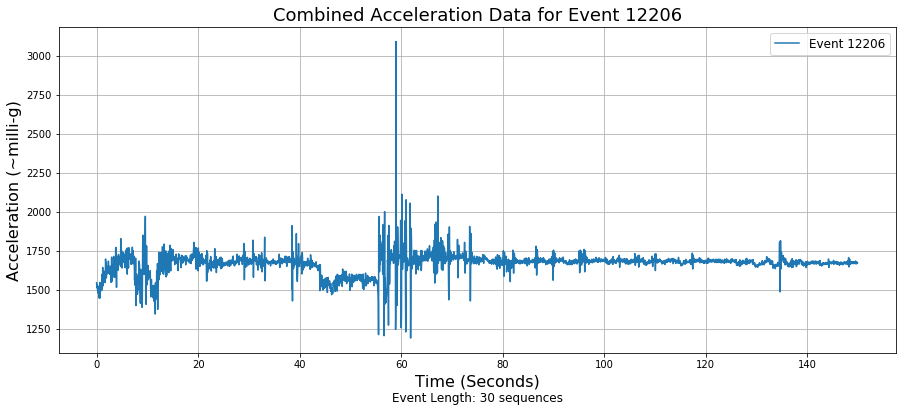

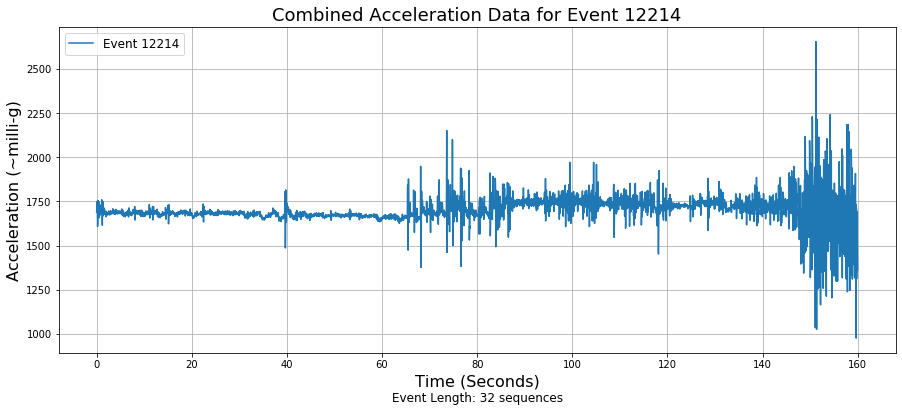

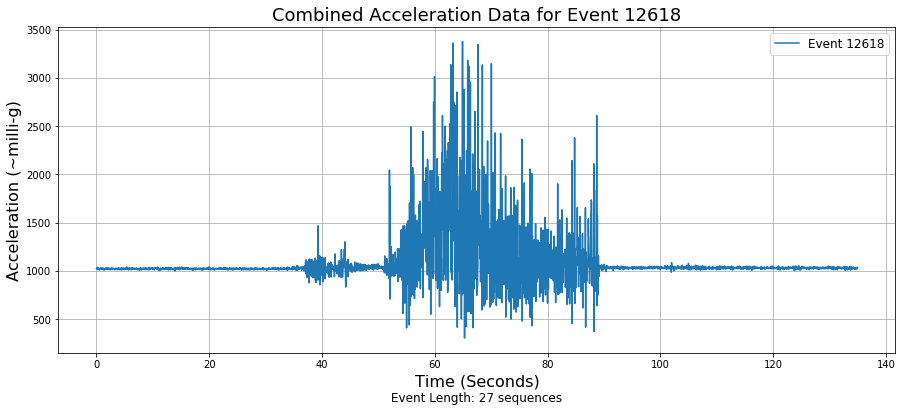

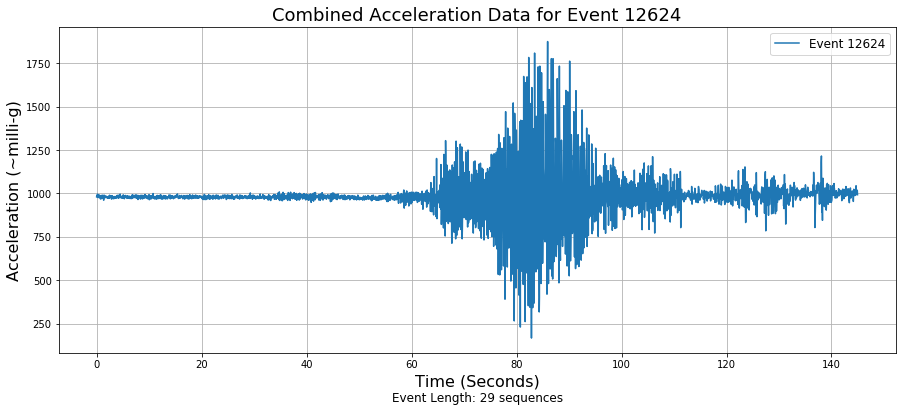

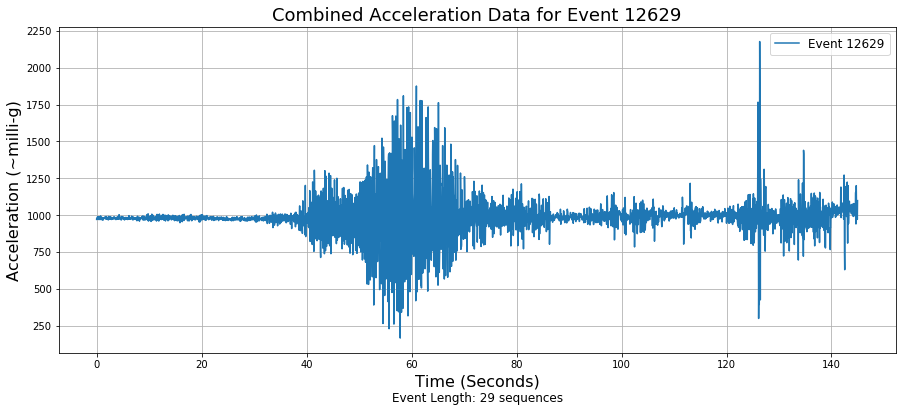

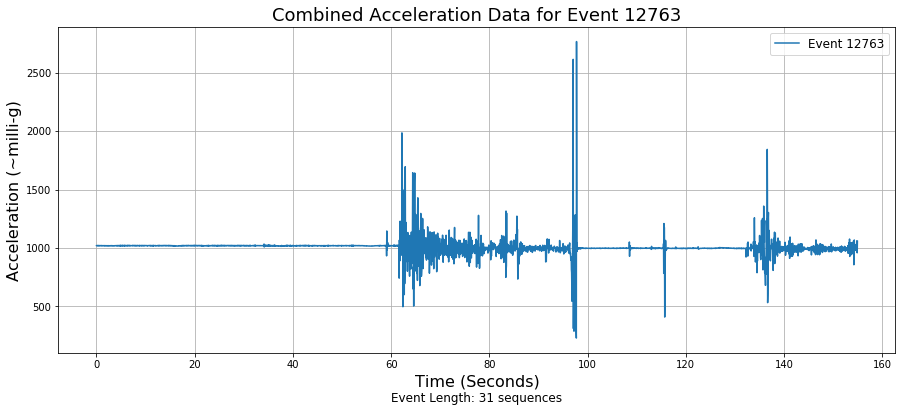

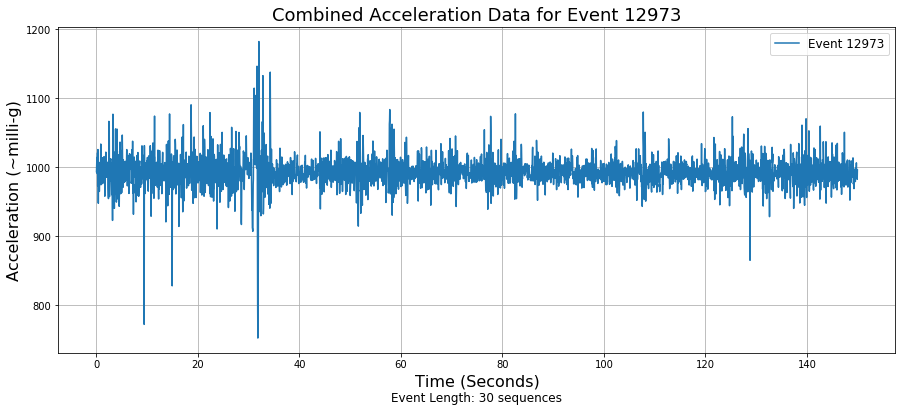

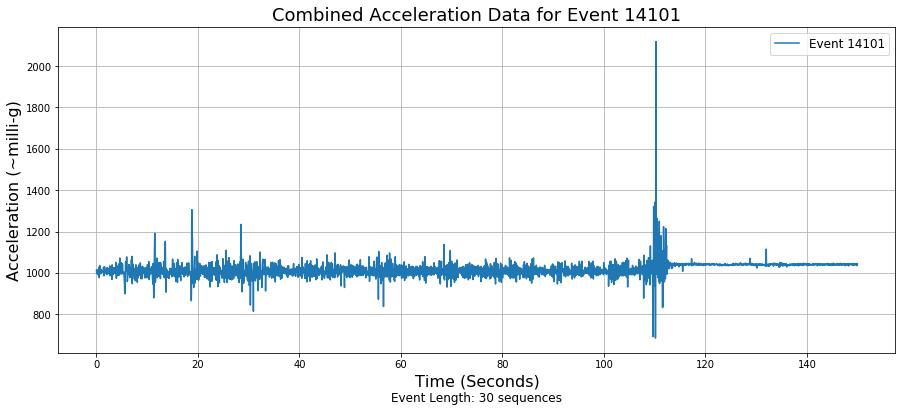

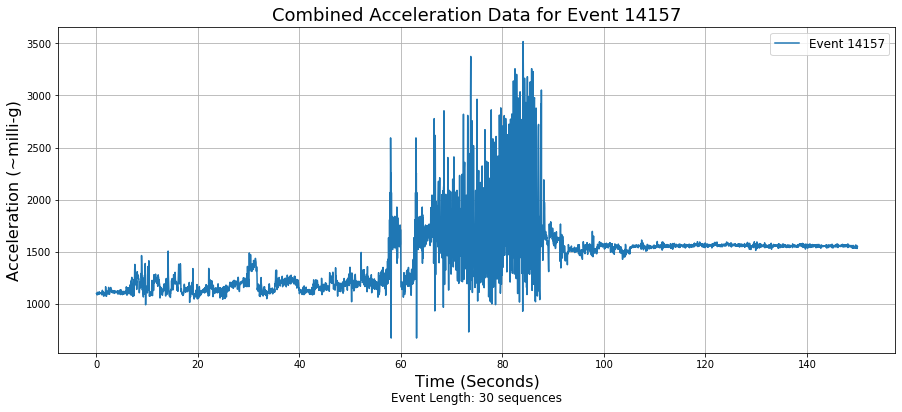

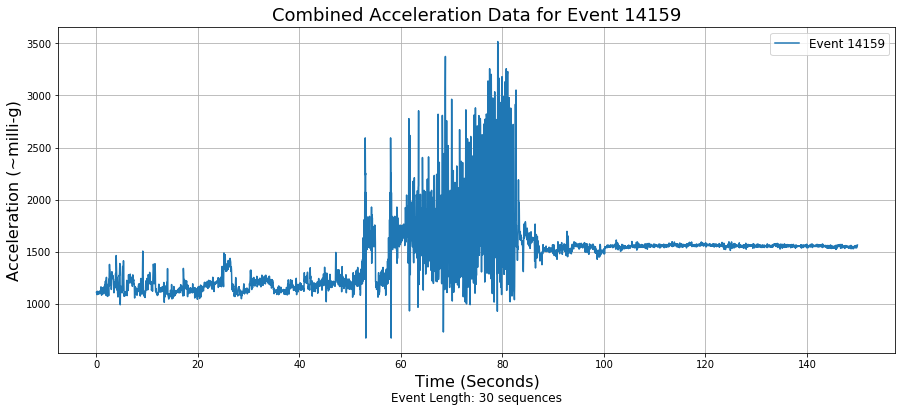

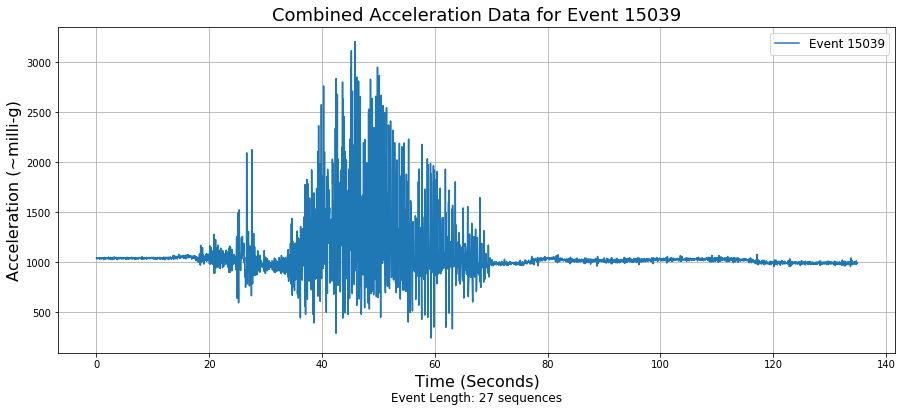

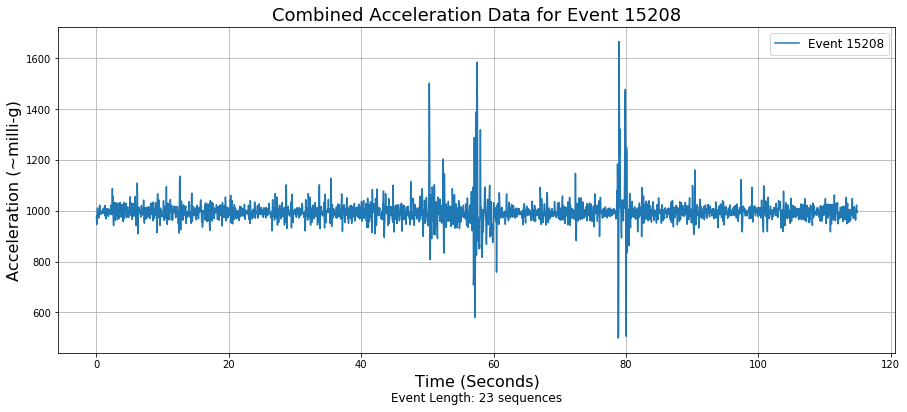

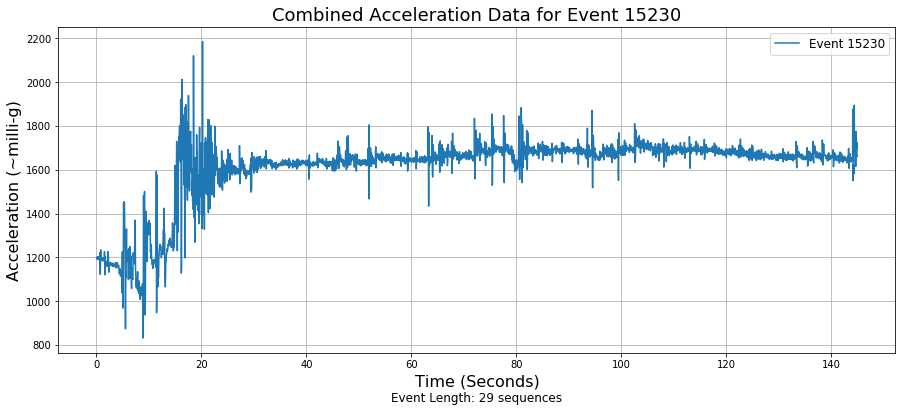

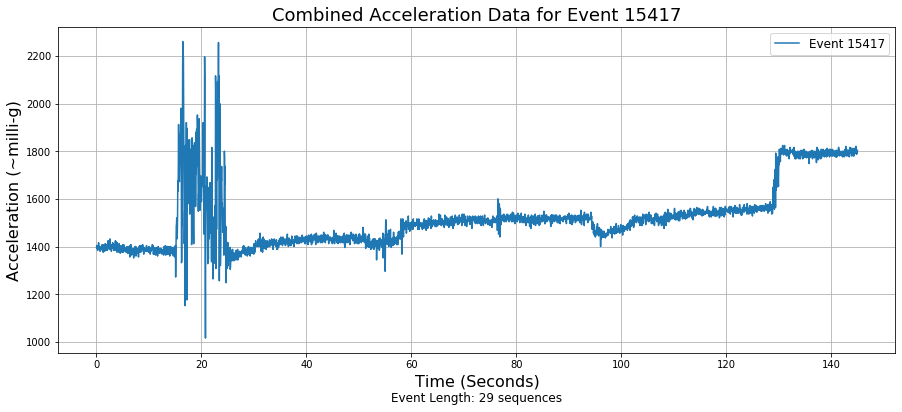

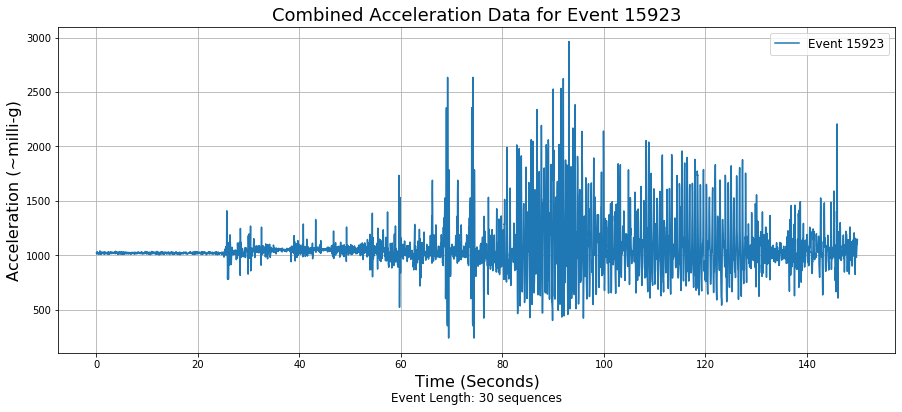

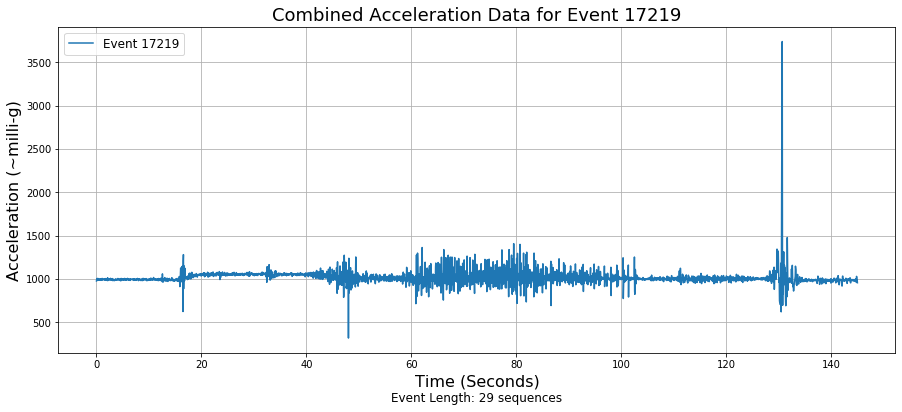

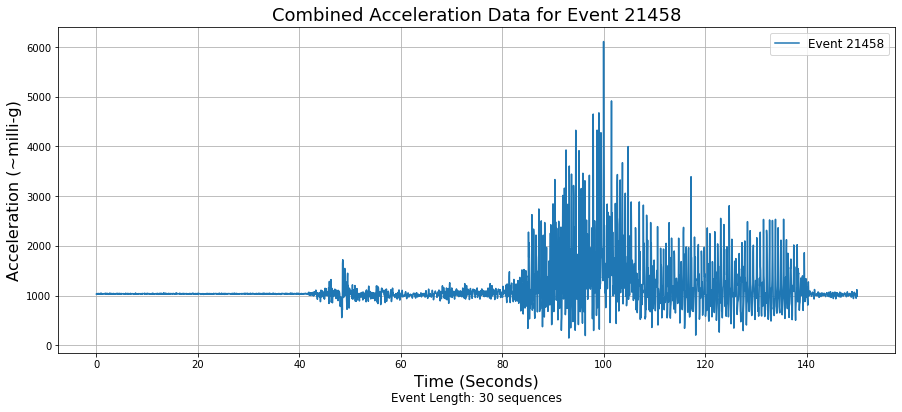

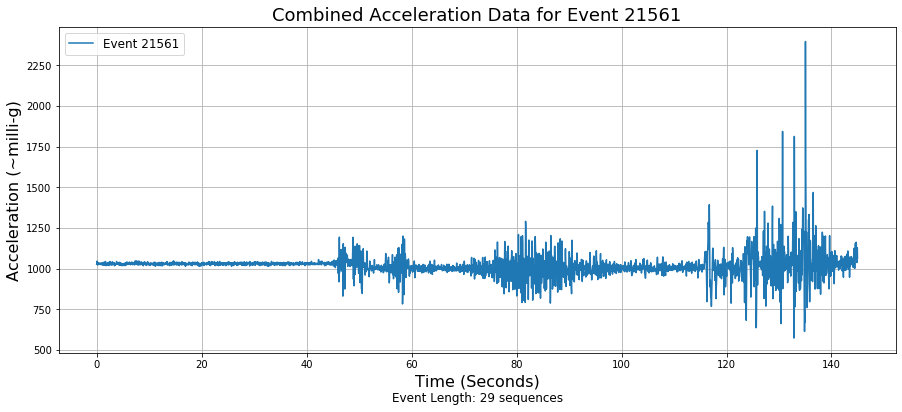

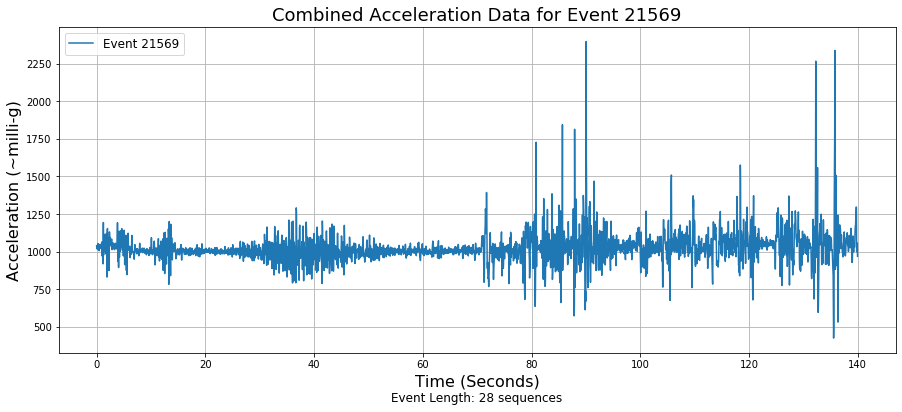

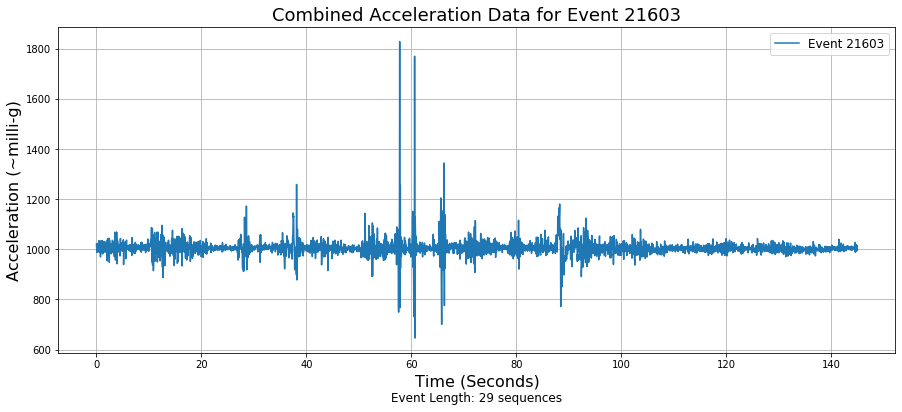

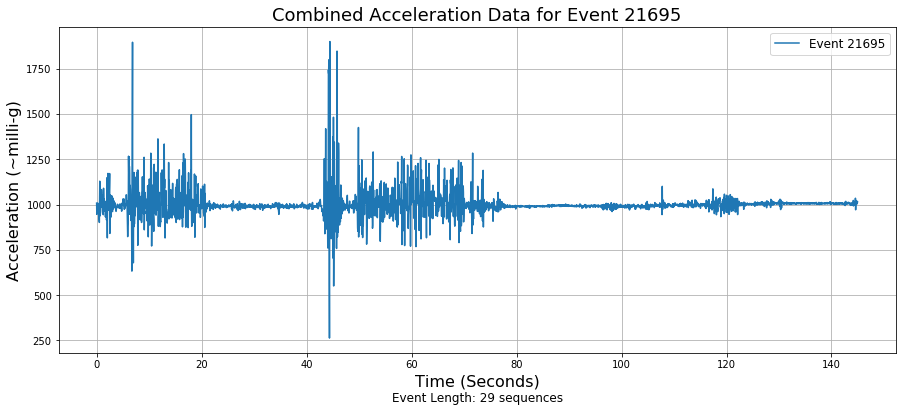

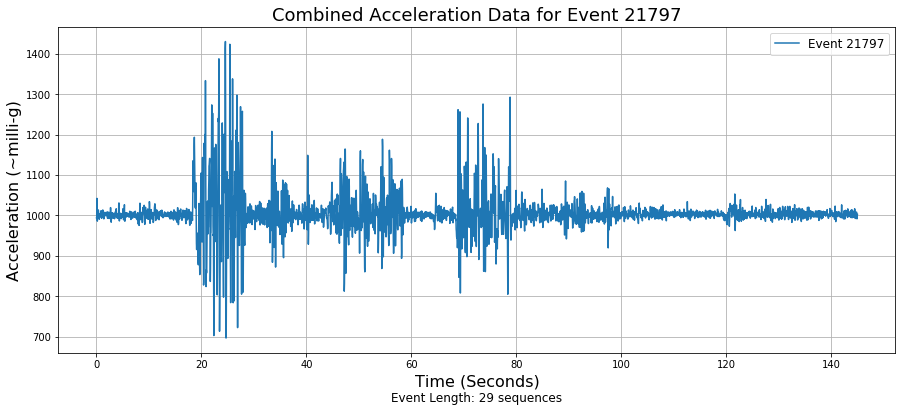

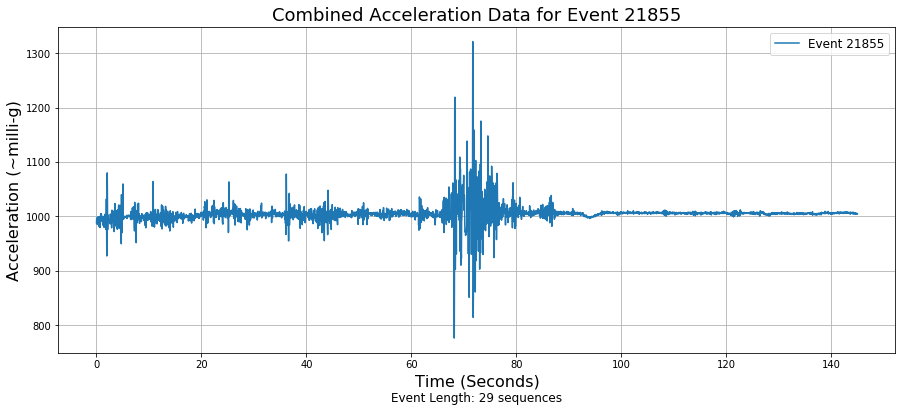

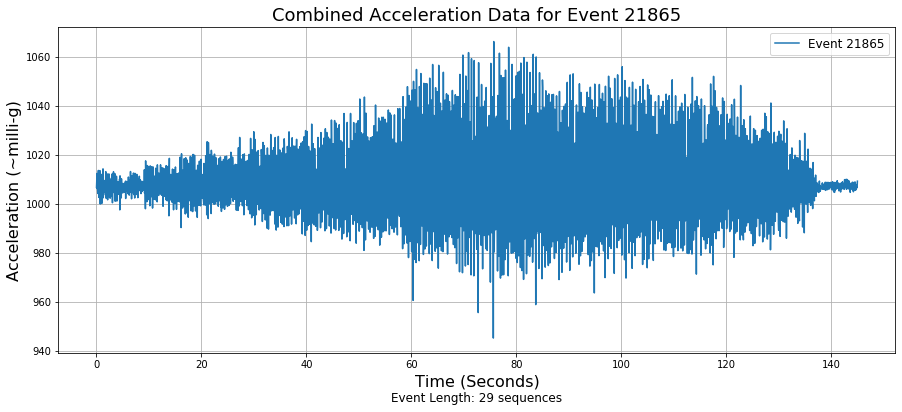

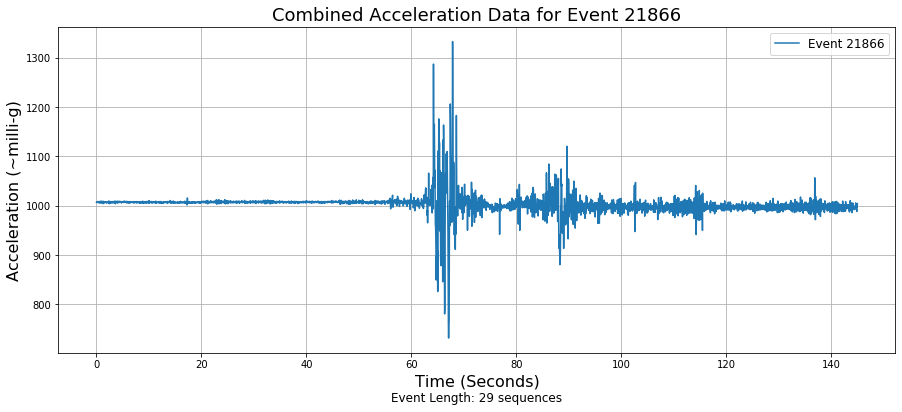

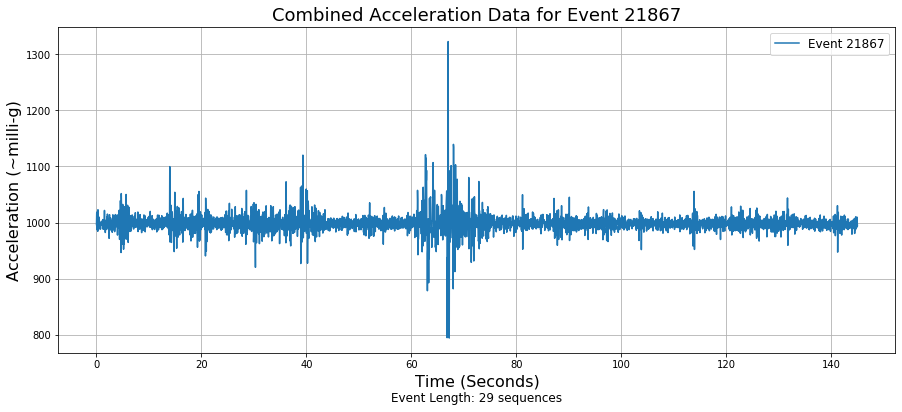

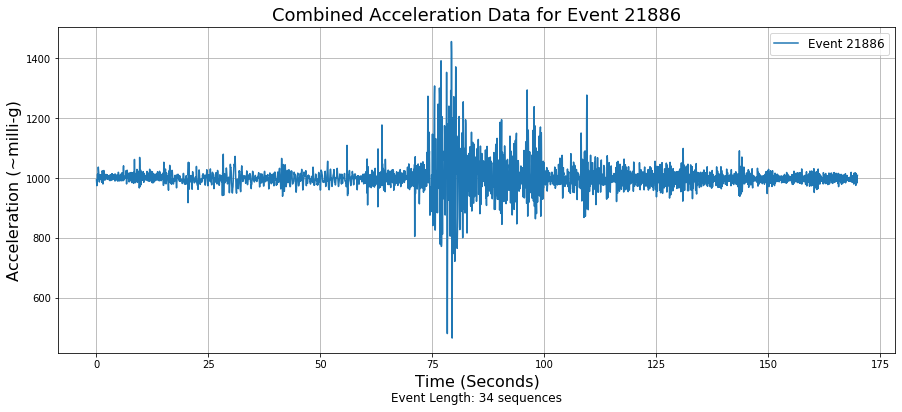

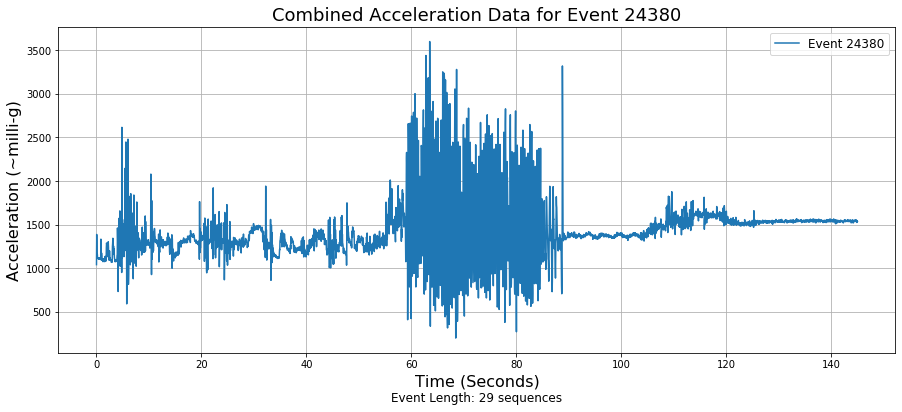

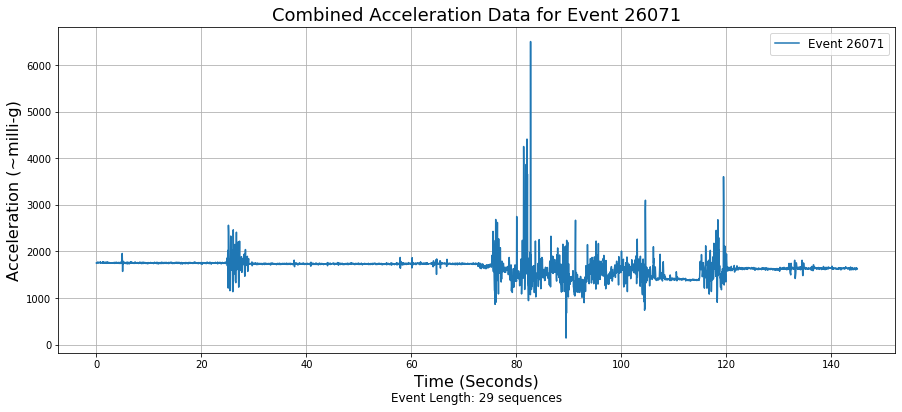

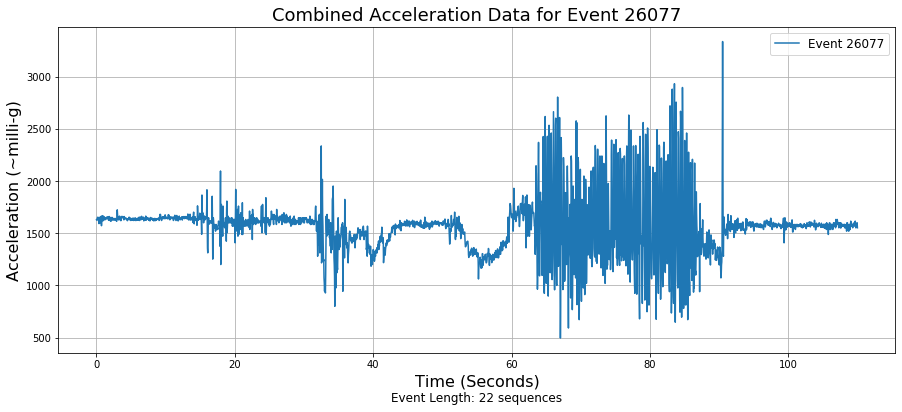

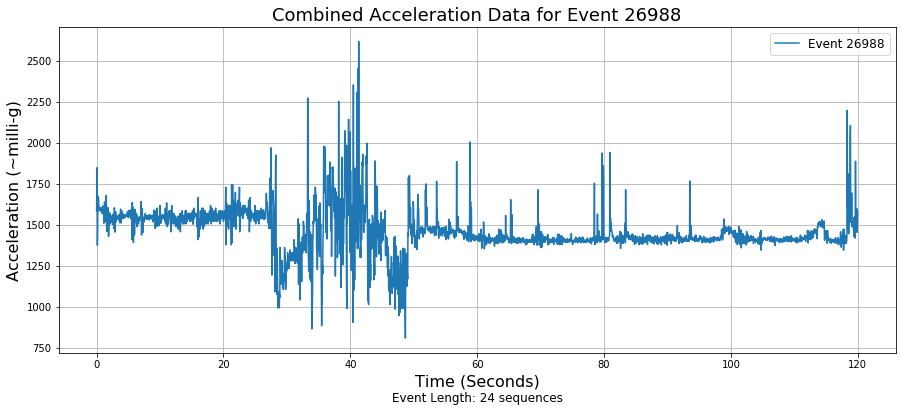

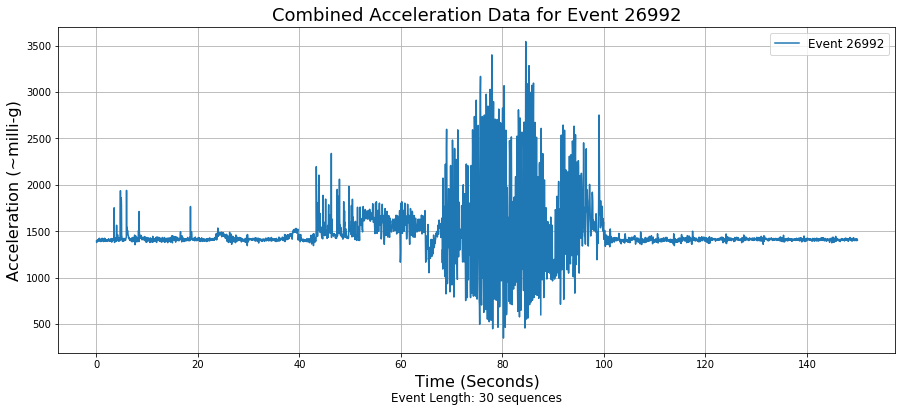

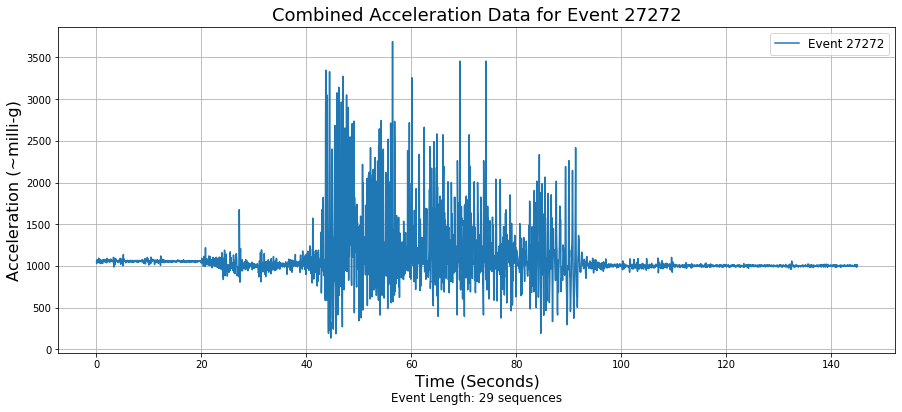

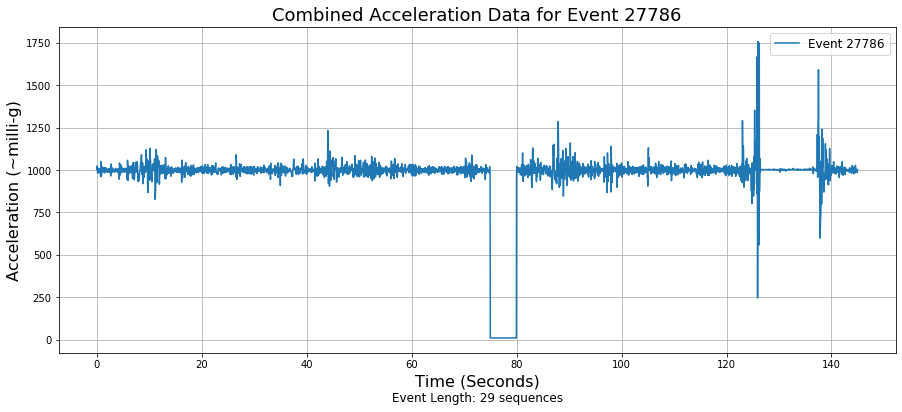

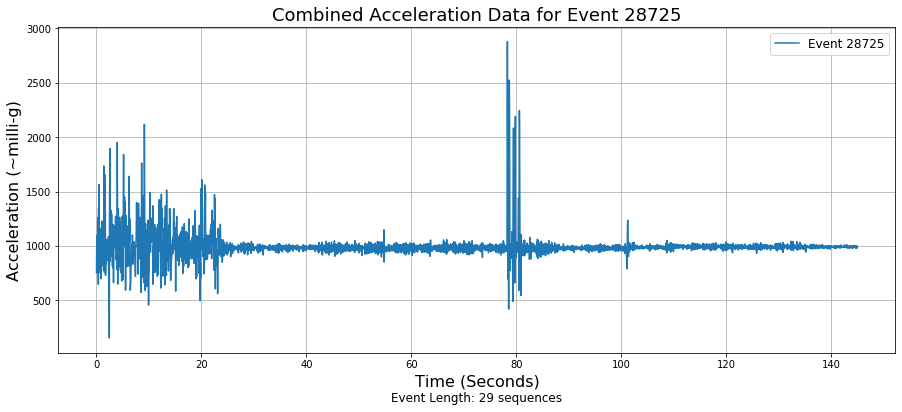

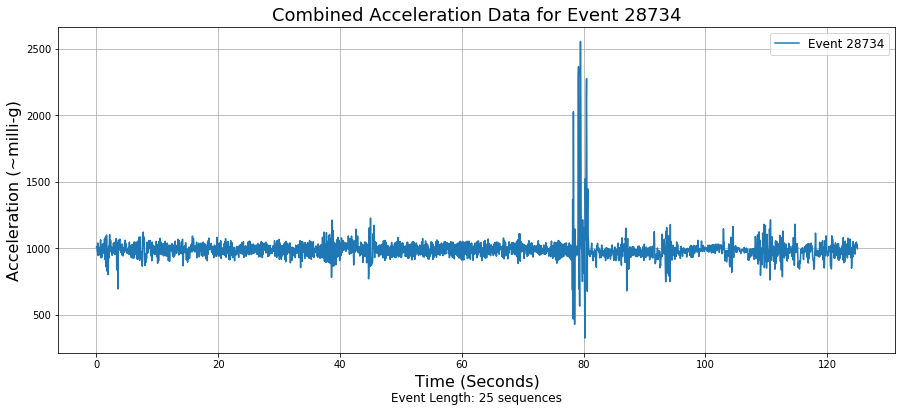

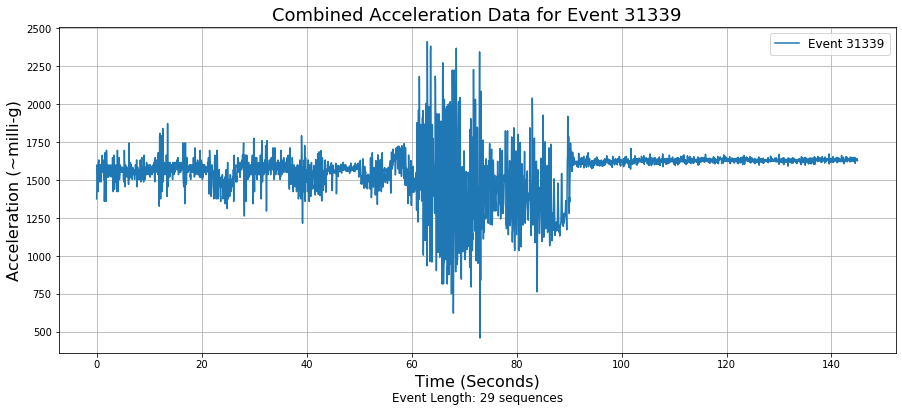

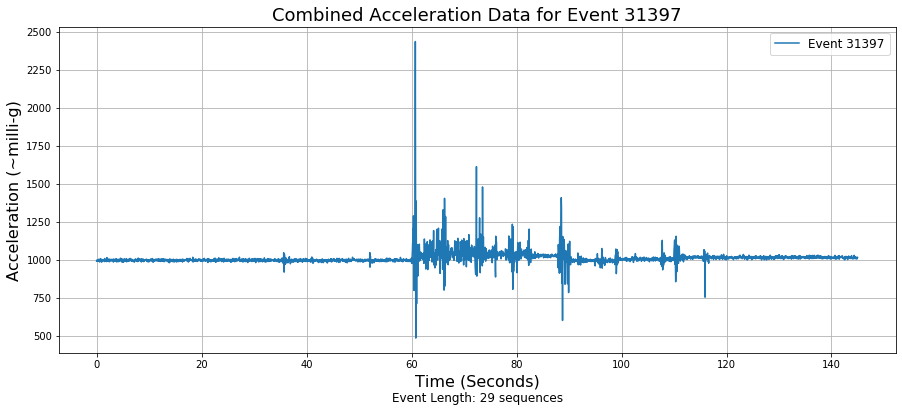

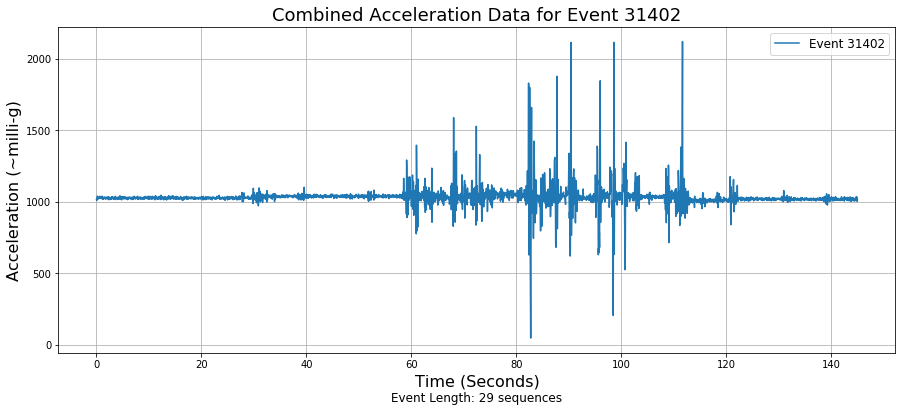

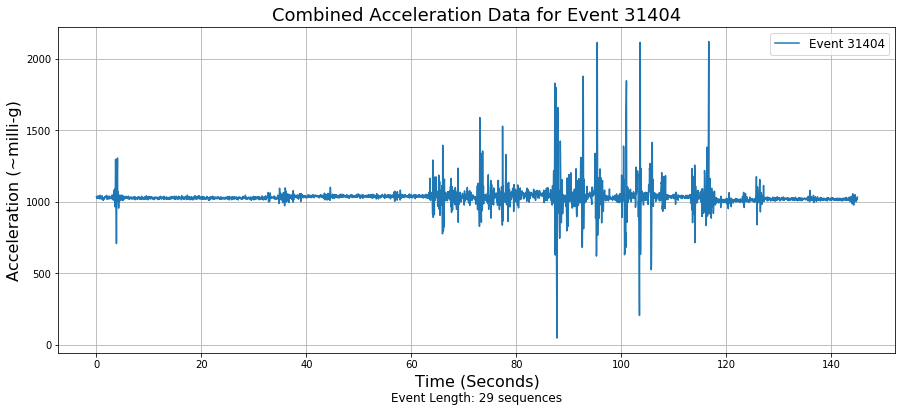

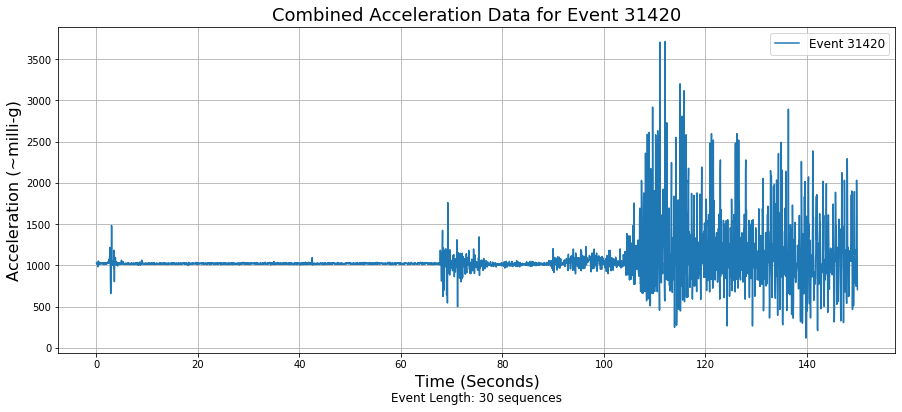

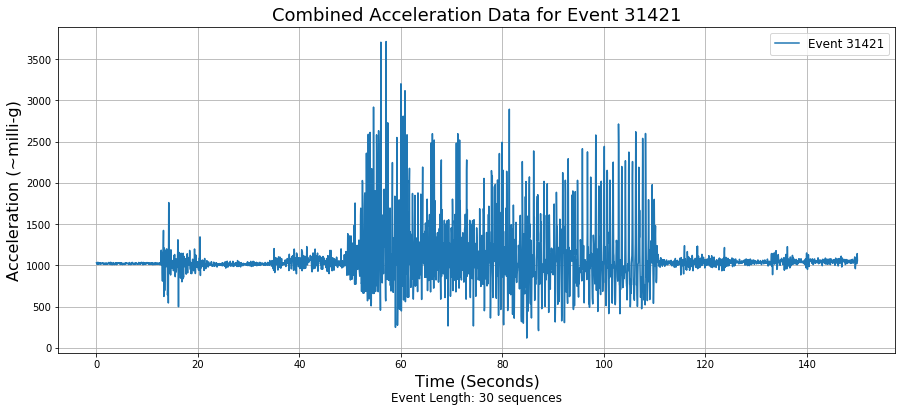

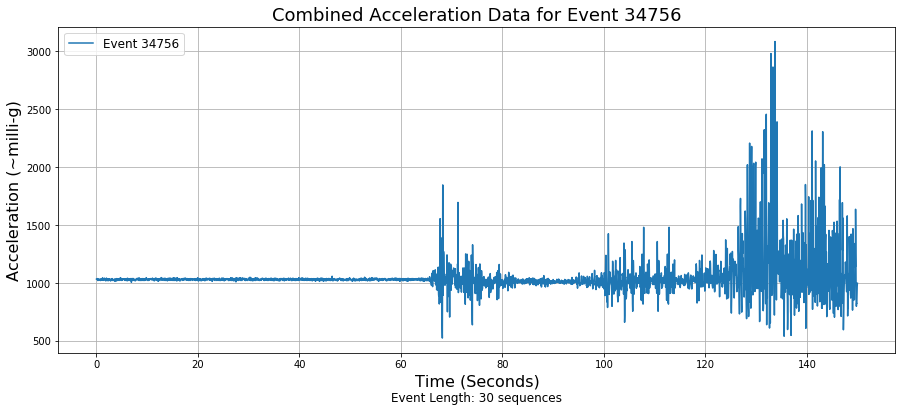

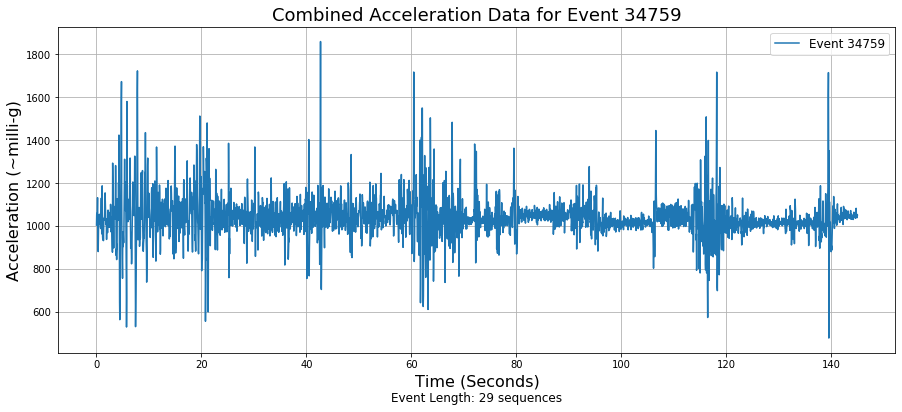

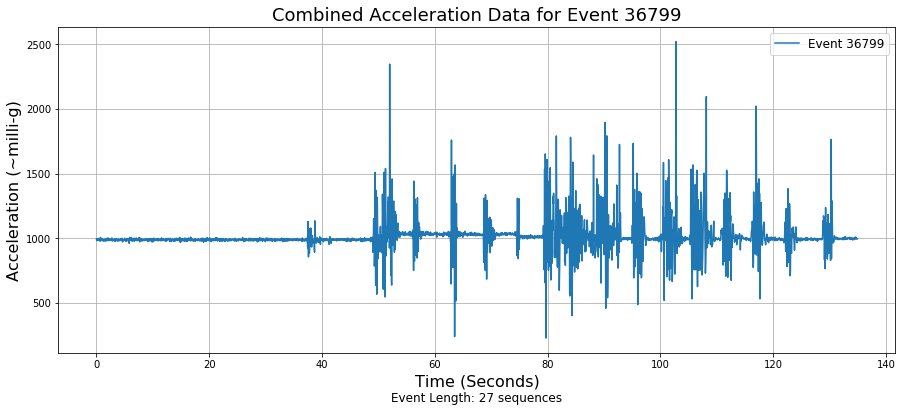

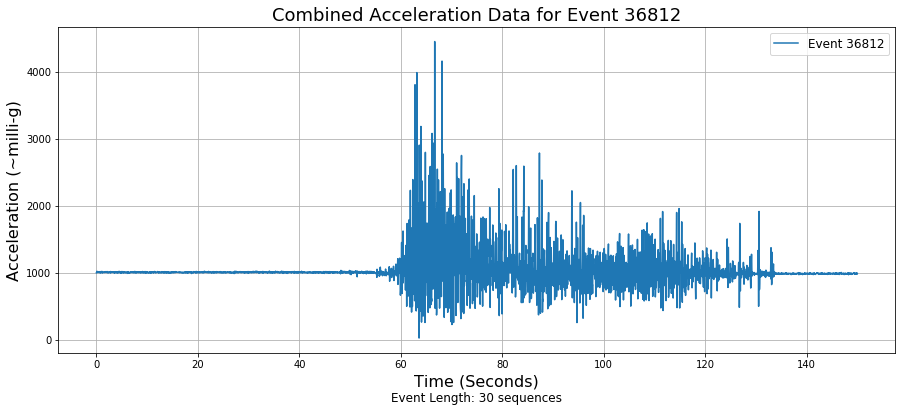

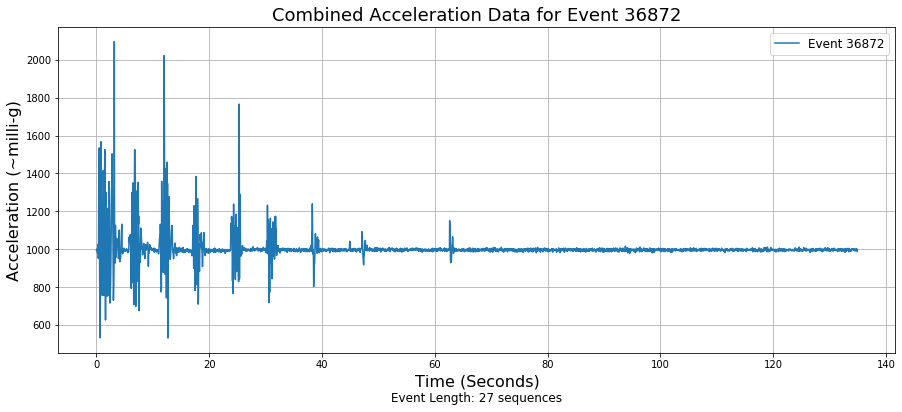

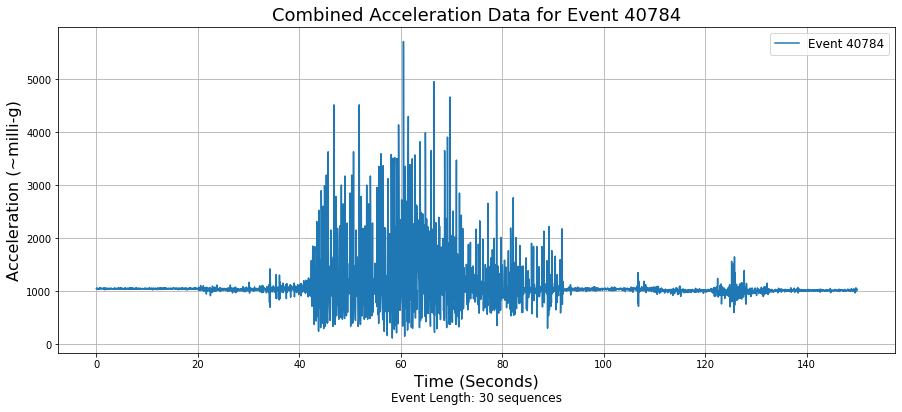

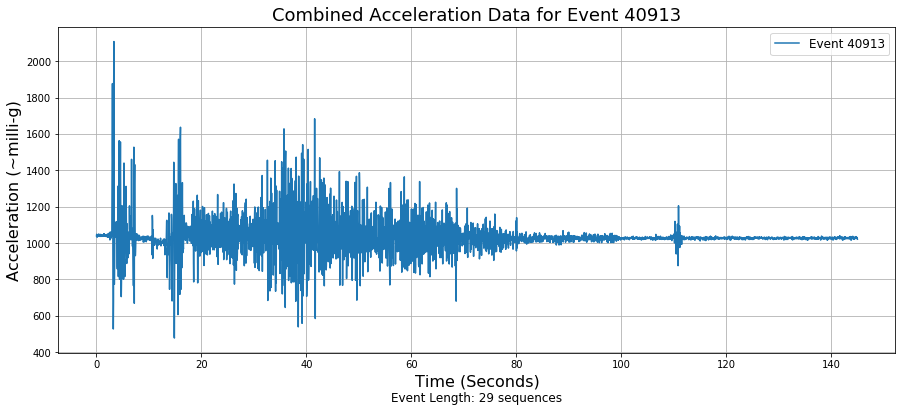

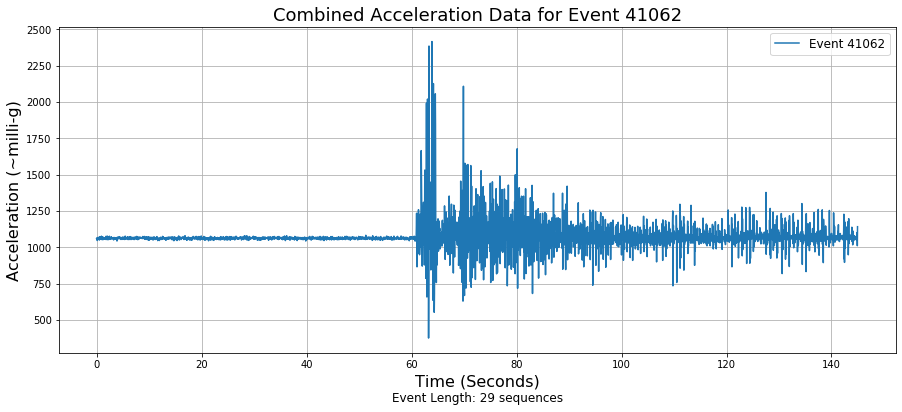

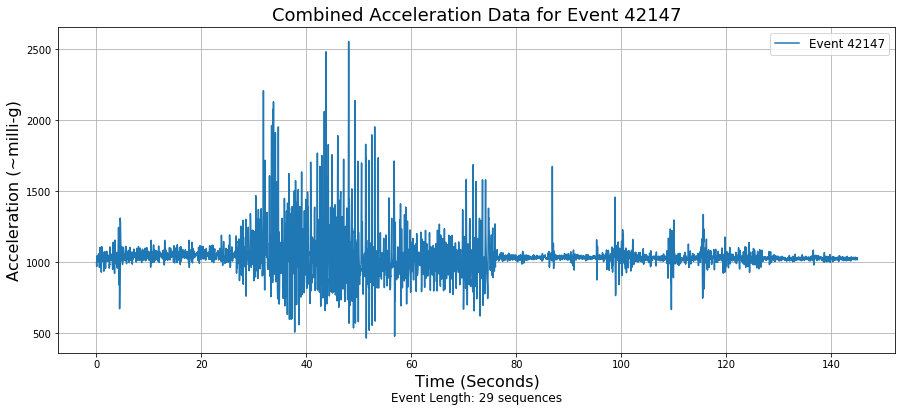

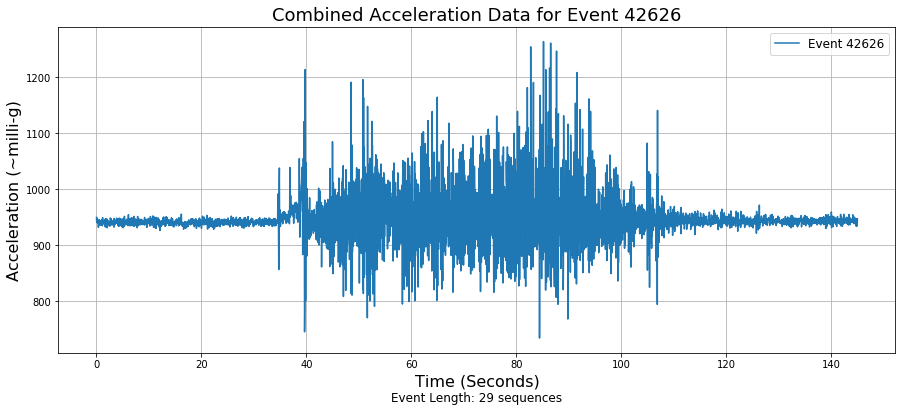

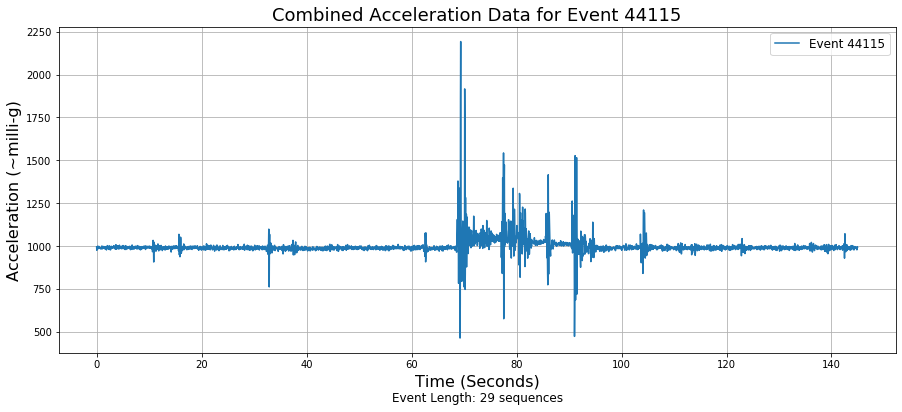

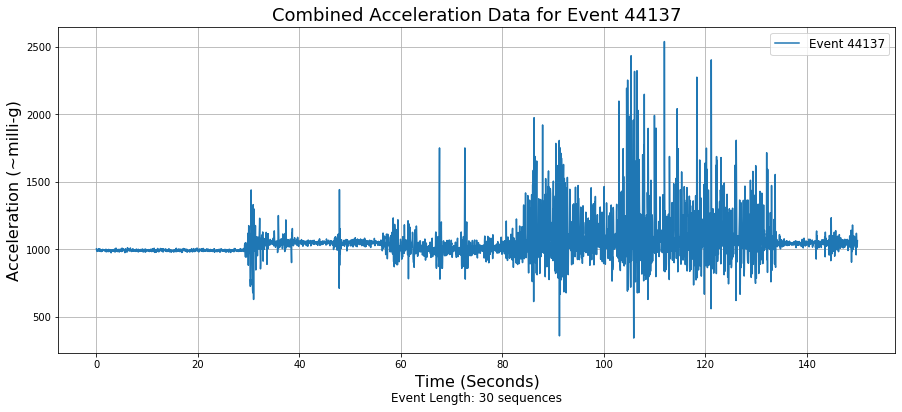

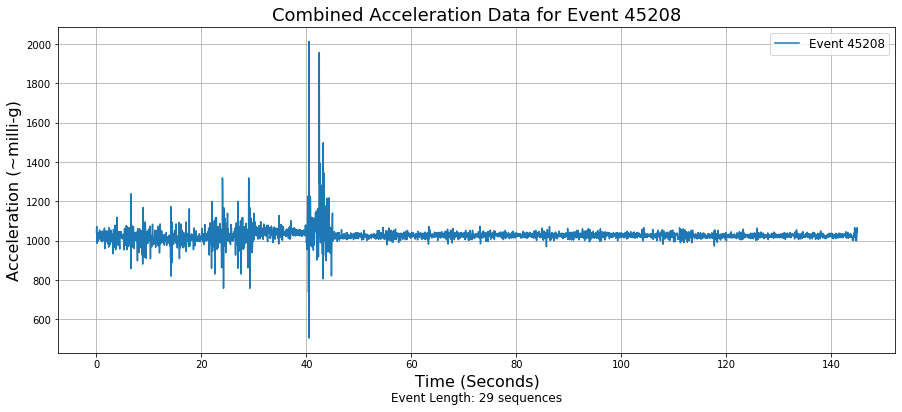

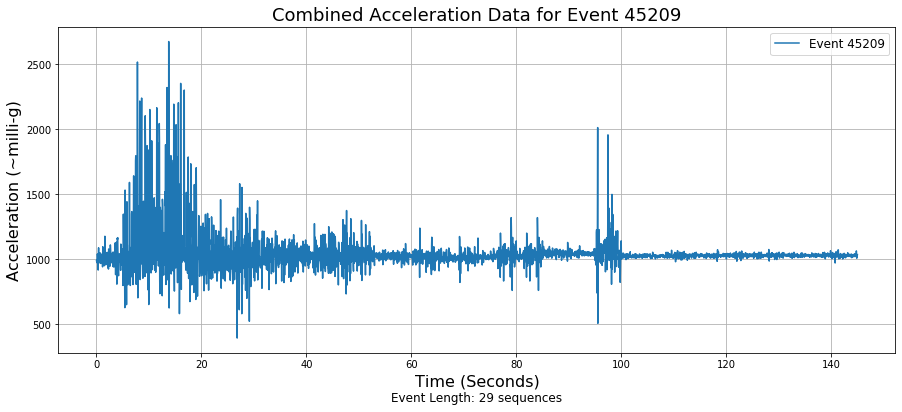

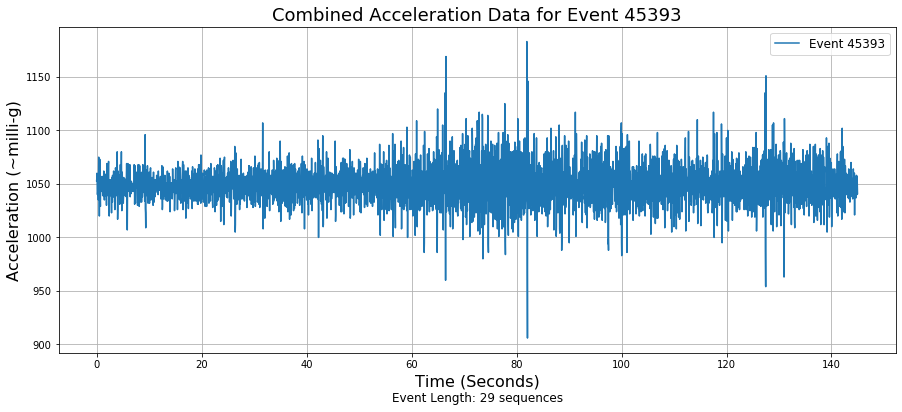

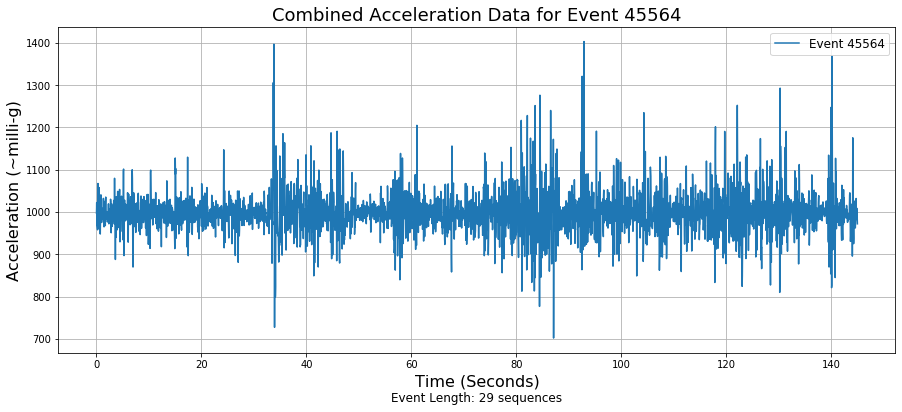

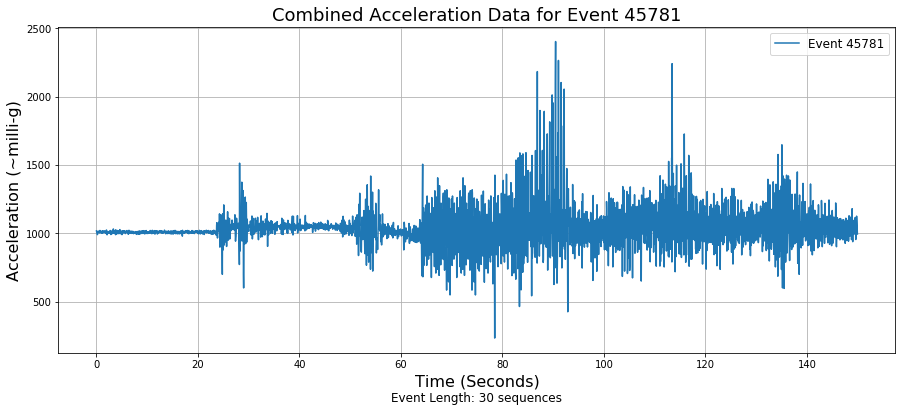

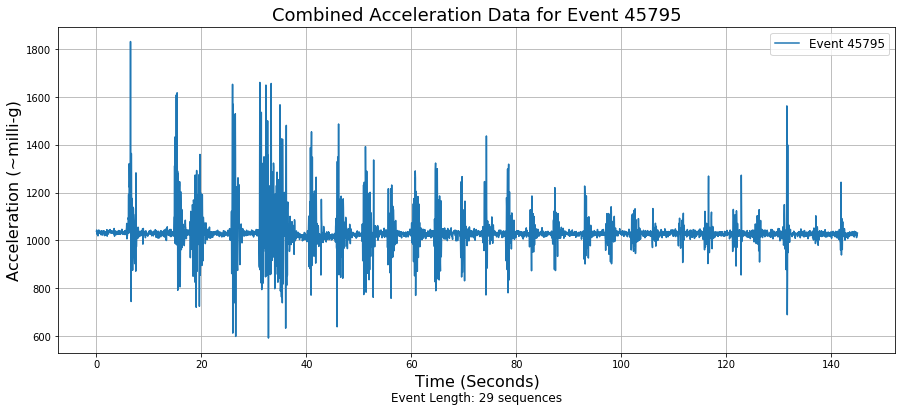

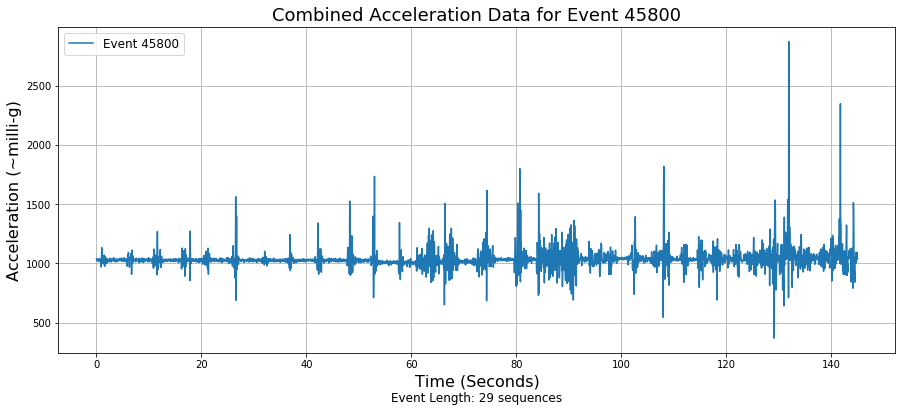

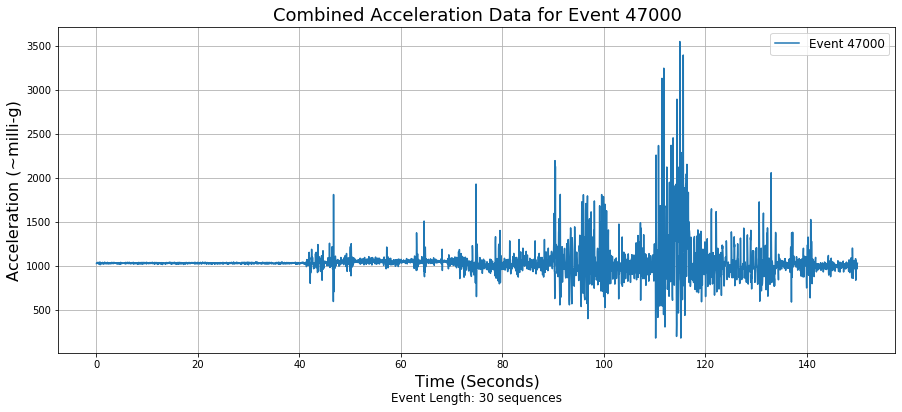

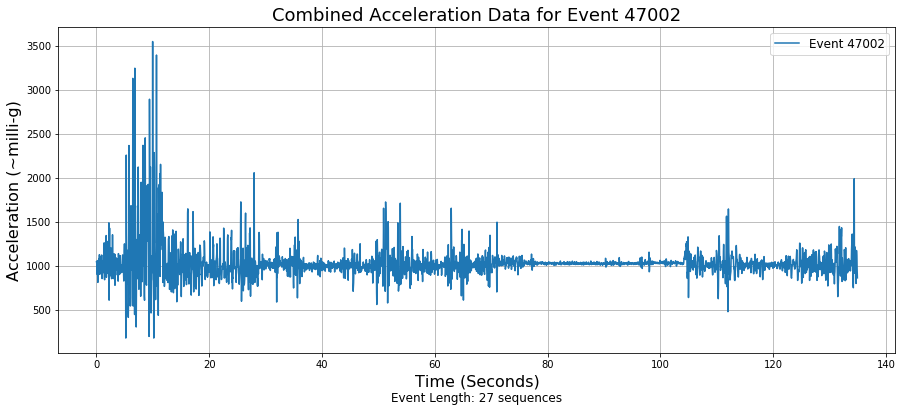

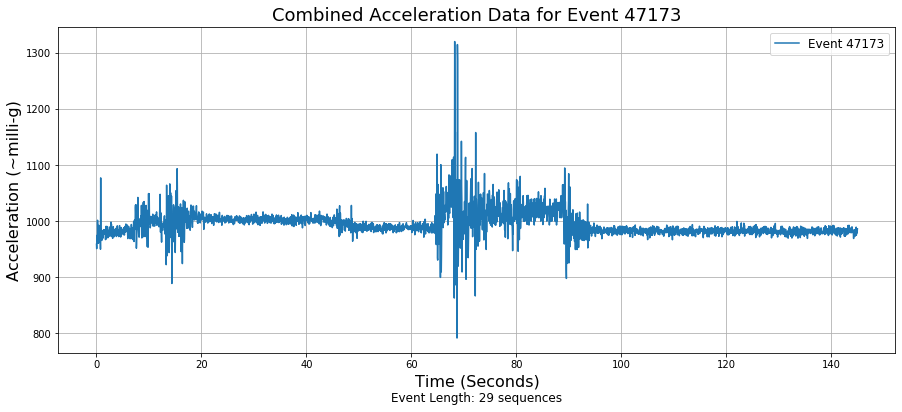

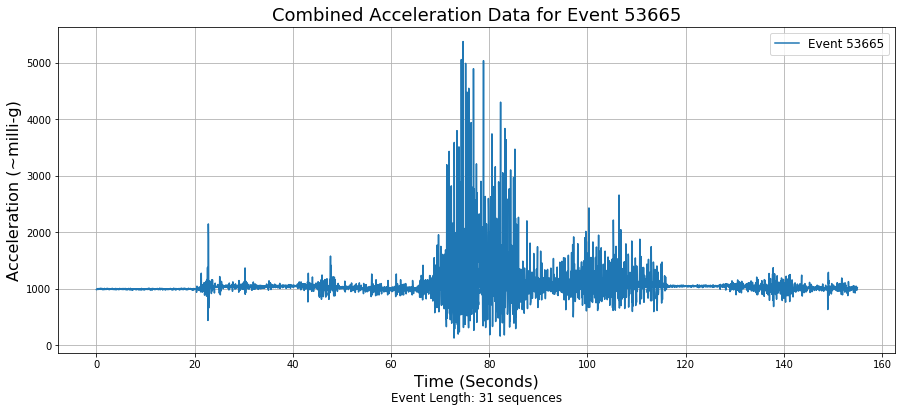

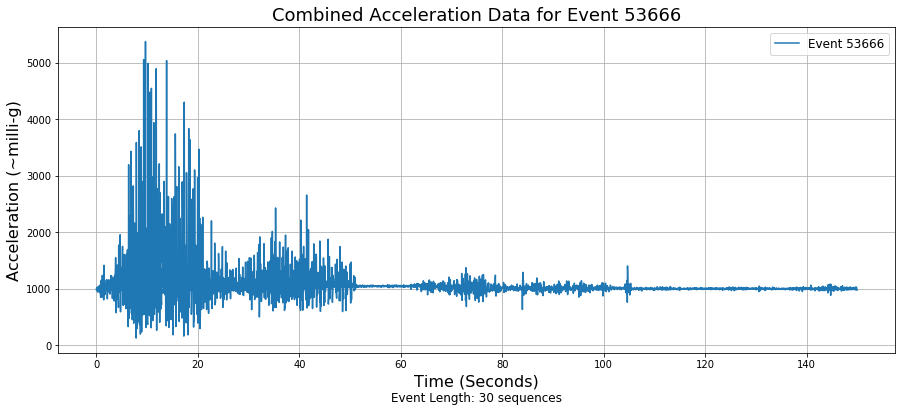

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data (replace with your actual data)
data_file = 'NEW_BASE_DATASET_WITH_DISTANCE.csv'

# Read the data into a DataFrame
df = pd.read_csv(data_file)

# Group the data by eventID
grouped = df.groupby('eventID')

# Plot each event's combined data
for eventID, group in grouped:
    plt.figure(figsize=(15, 6))
    combined_data = np.array([])
    event_length = len(group)  # Get the length of the event
    for raw_data in group['rawData']:
        # Extract acceleration data from rawData string
        acceleration_data = np.array([float(point) for point in raw_data.strip('[]').split(', ')])
        # Append the acceleration data to the combined data
        combined_data = np.concatenate((combined_data, acceleration_data))
    
    # Calculate time array based on the combined data length
    time = np.arange(len(combined_data)) / 125 * 5 # Assuming data is sampled at 125 Hz
    
    # Plot the combined acceleration data for the event
    plt.plot(time, combined_data, label=f'Event {eventID}')
    
    # Add length of the event as text annotation underneath the plot
    plt.text(0.5, -0.15, f'Event Length: {event_length} sequences', ha='center', transform=plt.gca().transAxes, fontsize=12)
    
    # Add labels and legend
    plt.xlabel('Time (Seconds)', fontsize=16)
    plt.ylabel('Acceleration (~milli-g)', fontsize=16)
    plt.title(f'Combined Acceleration Data for Event {eventID}', fontsize=18)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
